# Lab 7- Data Analysis

Exercises 1-4 are to be completed by March 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf).

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms.

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## GitHub does not accept data!

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY).

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS:
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [2]:
#!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0   933k      0 --:--:--  0:16:04 --:--:-- 5313k


In [3]:
#!gunzip SUSY.csv.gz

In [4]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Apr  4 13:24 sample_data/
-rw-r--r-- 1 root root 2.3G Apr  5 20:14 SUSY.csv


#### Combine Features
Feature engineering, or algorithm that finds the bet way to combine them.

Each row represents a collision.
Signal data is small percentage of the dataset, and the rest is background. Look at the energy and direction of the leptons. **Eta signal data has values closer to zero than background.** *Dark matter* is escaping in MET (measure of missing energy) in background. MET_rel is less accurate? axial_MET (actual, to find difference between signal and background). M_R are computed and some others near the end (high level features that have been engineered). Momenta and missing energy provides needed information (seperate low and high level features). Networks will learn from the raw features to "compuete" or learn the rest.
## **Goal:**
#### Improve the procedure that produces the selection region. Create a machine learning classification algorithm to differentitate between signal and background?

The data is provided as a comma separated file.

In [6]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [7]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [8]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [9]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [10]:
FeatureNames

['dPhi_r_b',
 'MT2',
 'S_R',
 'cos_theta_r1',
 'M_TR_2',
 'R',
 'MET_rel',
 'M_R',
 'M_Delta_R',
 'axial_MET']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [12]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluating the dataframe:

In [13]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was **signal or not**. Pandas makes it easy to create dataframes that store only the signal or background events:

In [14]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

df2 = df.head(500000)

In [15]:
df_sig2=df2[df.signal==1]
df_bkg2=df2[df.signal==0]

<ipython-input-15-4801624aa0da>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sig2=df2[df.signal==1]
<ipython-input-15-4801624aa0da>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bkg2=df2[df.signal==0]


The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


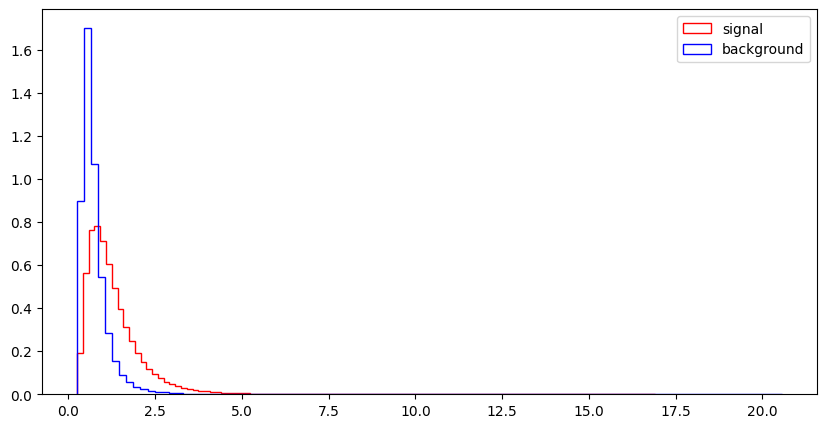

l_1_eta


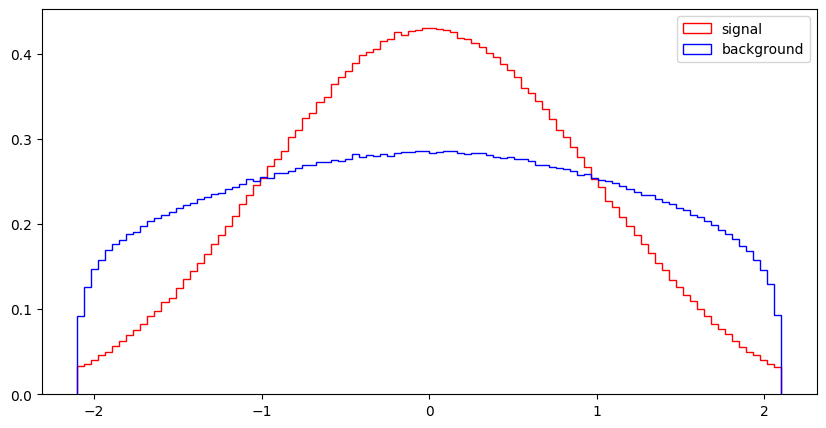

l_1_phi


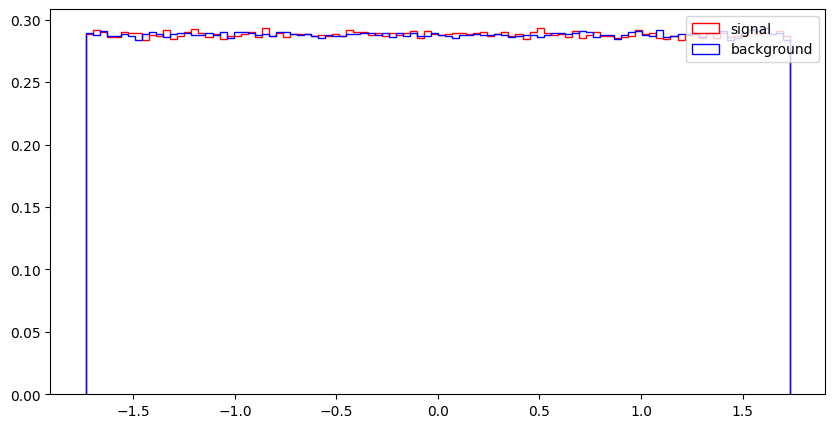

l_2_pT


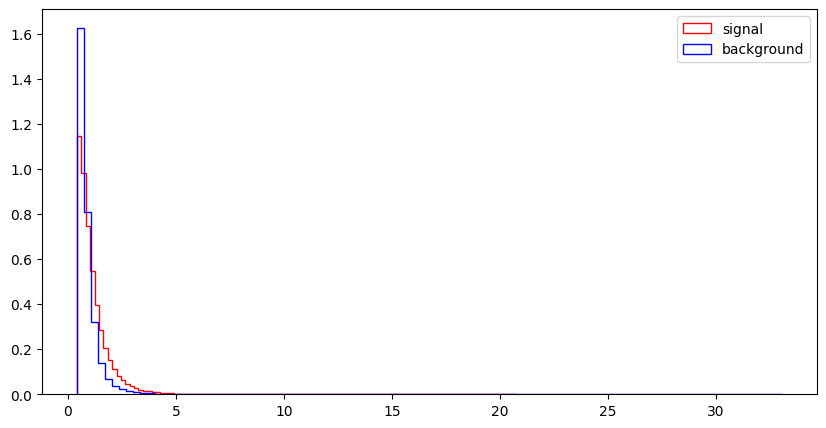

l_2_eta


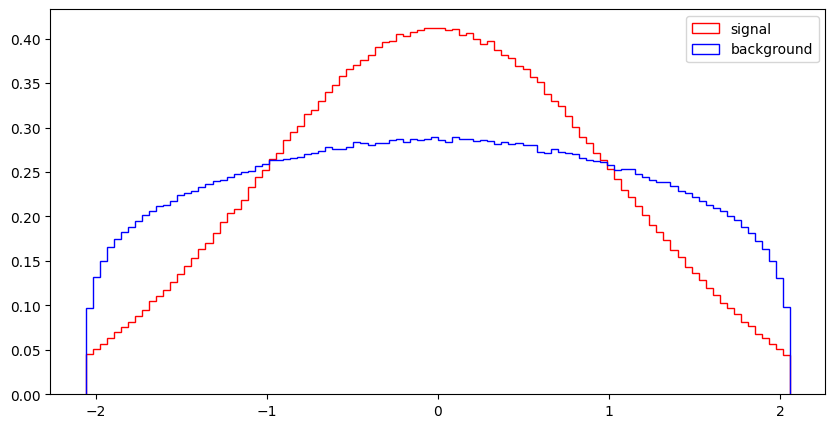

l_2_phi


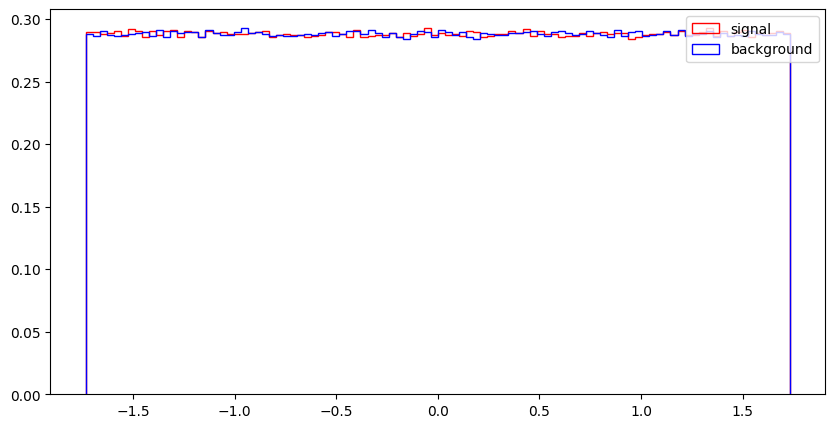

MET


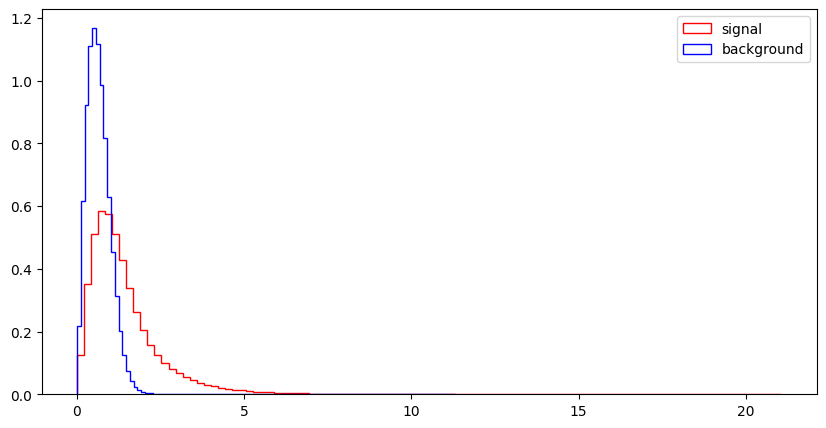

MET_phi


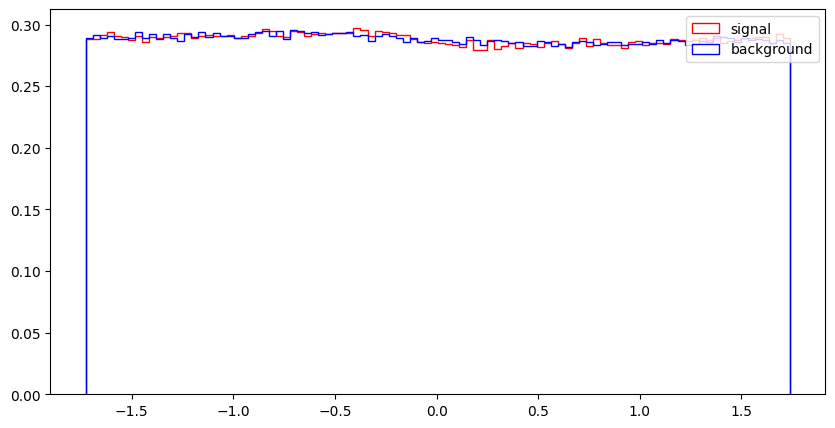

MET_rel


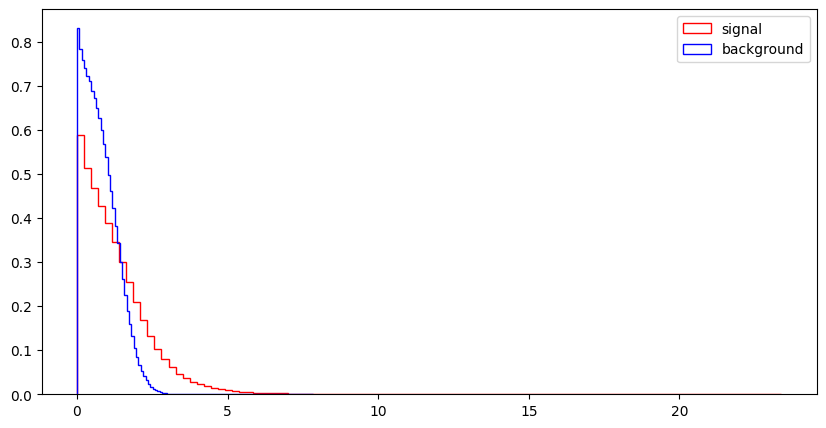

axial_MET


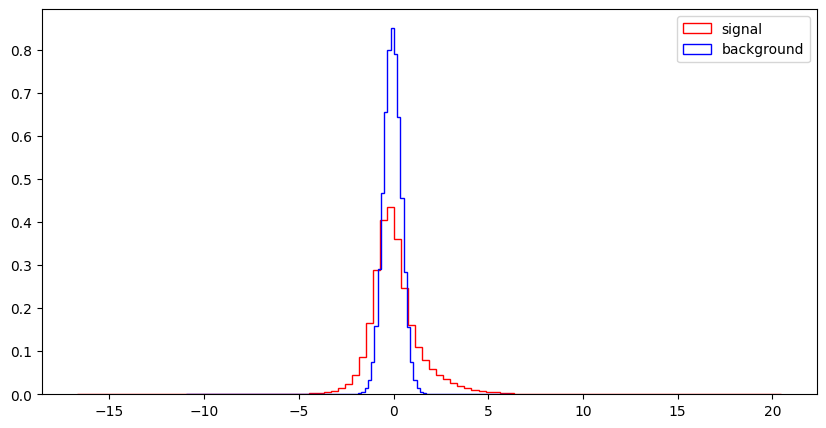

M_R


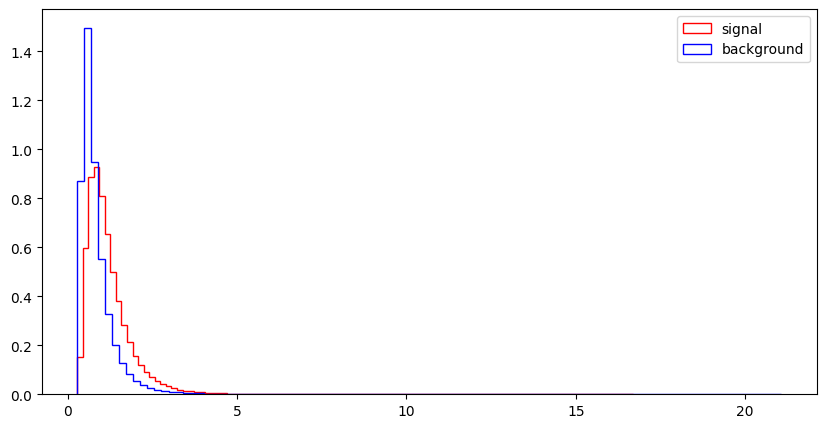

M_TR_2


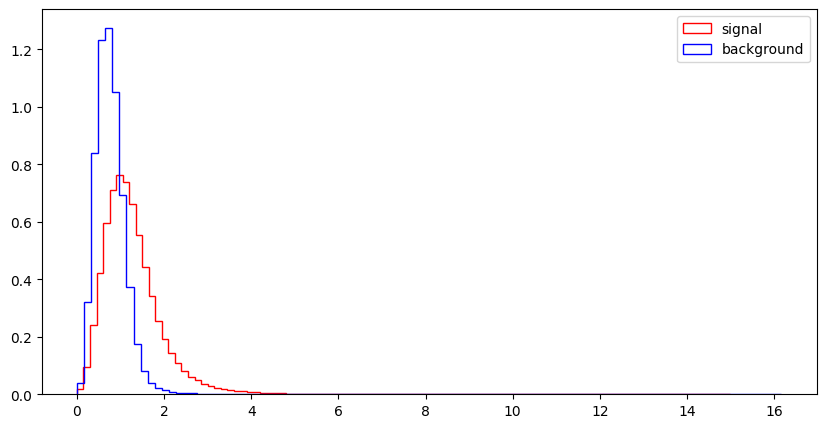

R


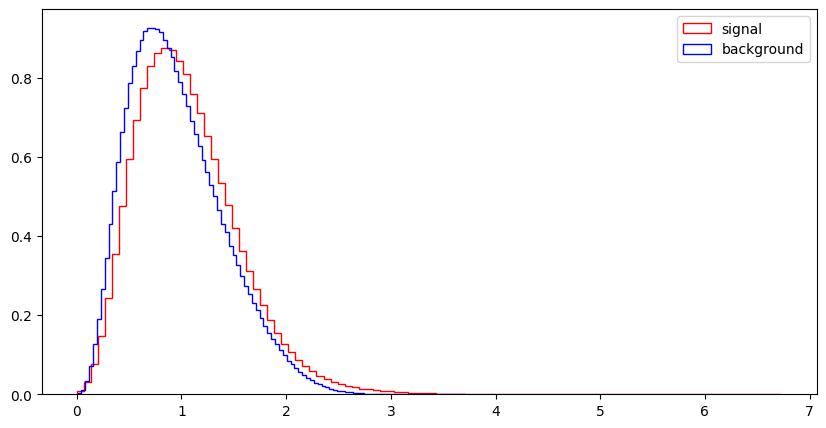

MT2


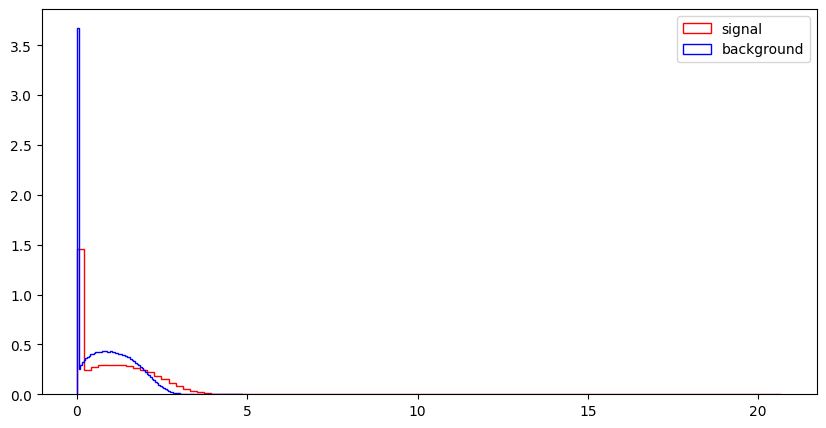

S_R


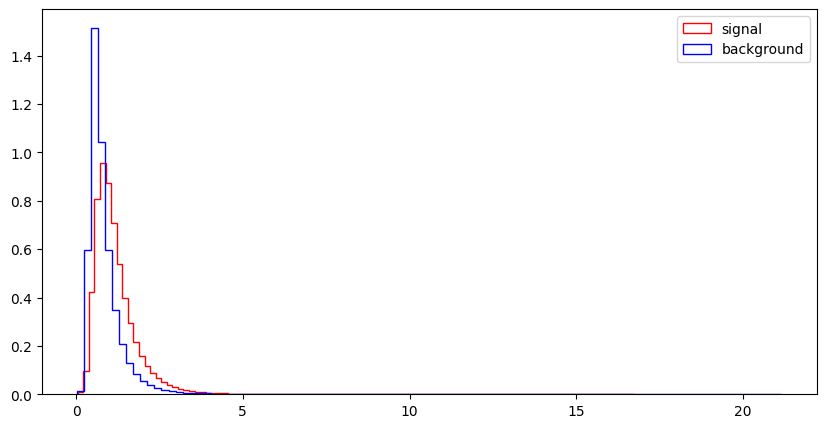

M_Delta_R


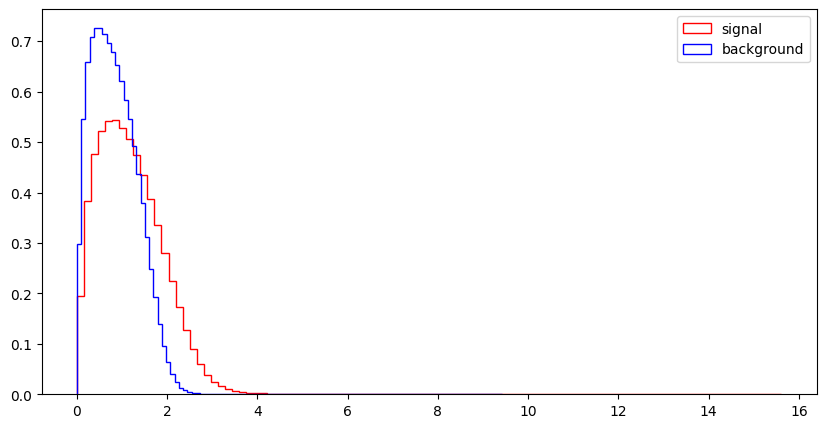

dPhi_r_b


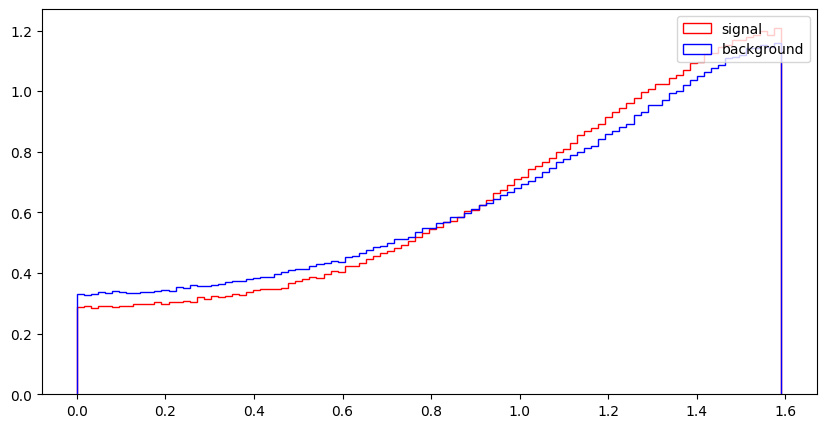

cos_theta_r1


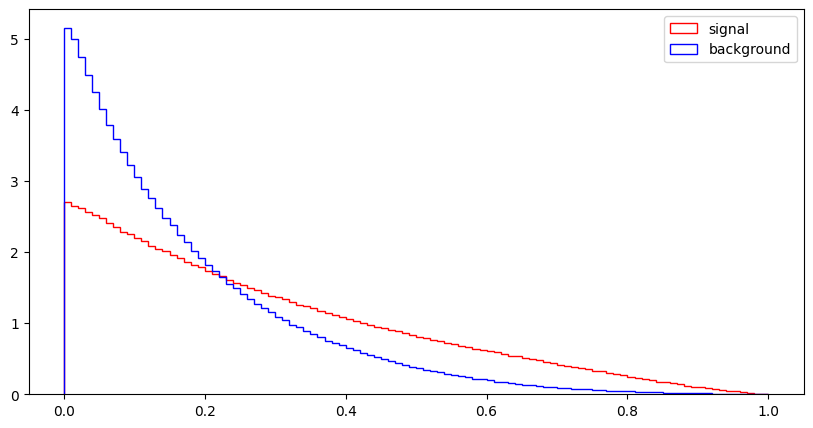

In [16]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!
- Fraction of events for signal and background for each column?

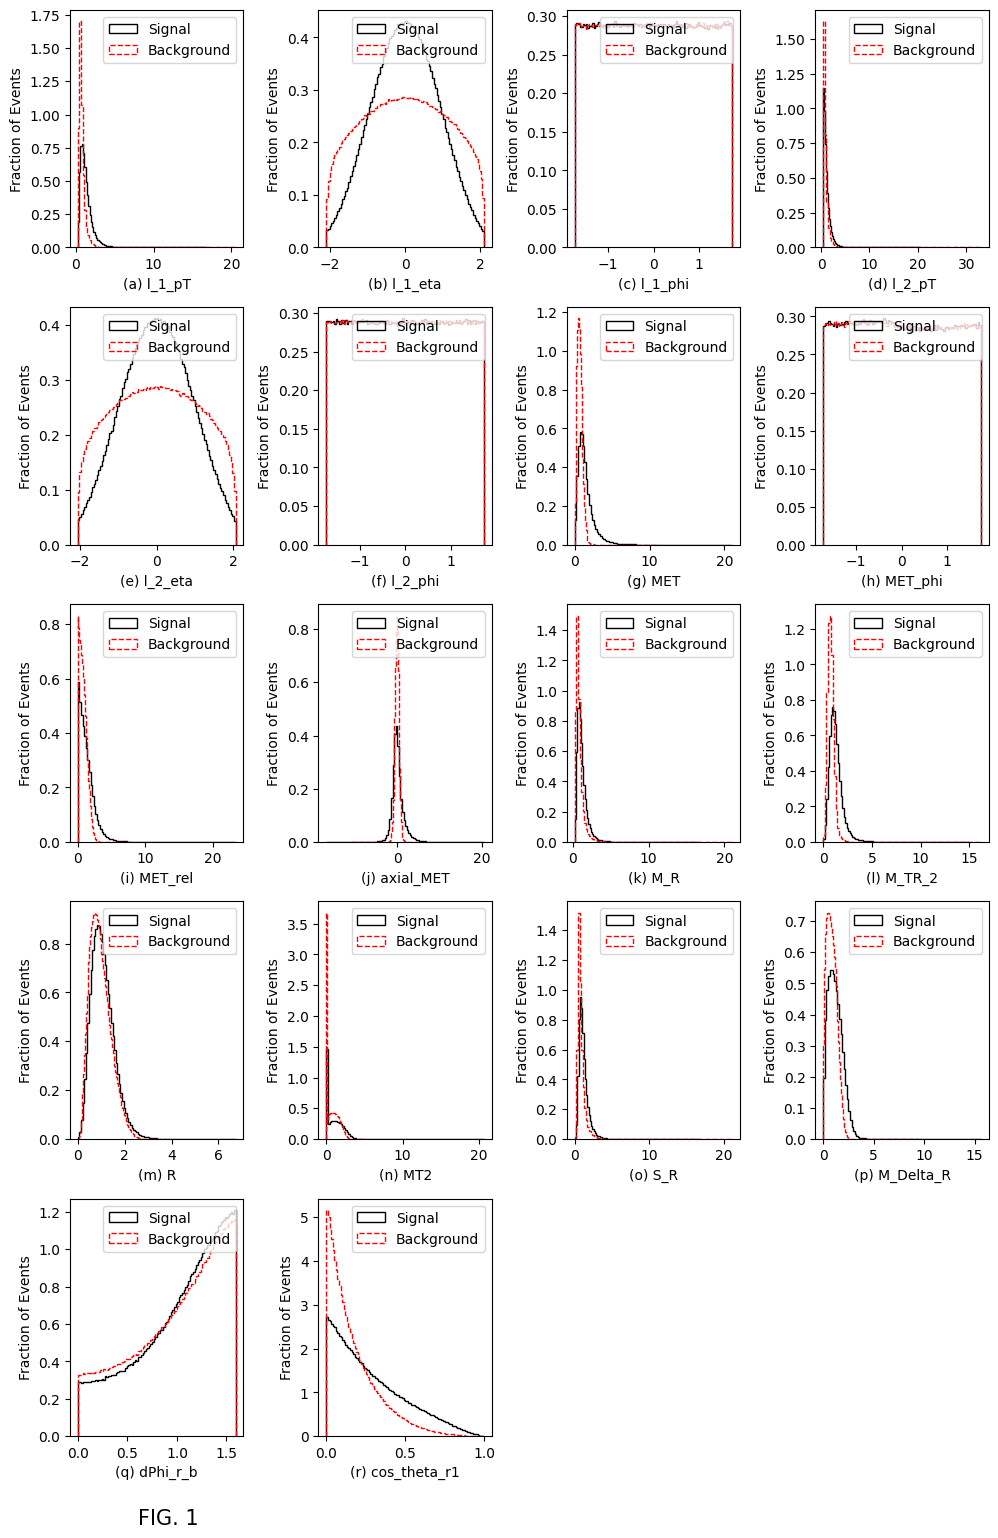

In [17]:
# Define letters for labeling subplots
letters=["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)","(m)","(n)","(o)","(p)","(q)","(r)"]

def plot_histograms(df_sig, df_bkg, VarNames, figsize=(10, 15)):
    plt.figure(figsize=figsize)

    # Iterate over variables
    for i, var in enumerate(VarNames[1:]):
        # Create subplots
        plt.subplot(5, 4, i + 1)

        # Plot histograms for signal and background
        plt.hist(np.array(df_sig[var]), bins=100, histtype="step", color="black", label="Signal", density=1, stacked=True)
        plt.hist(np.array(df_bkg[var]), bins=100, histtype="step", color="red", linestyle="--", label="Background", density=1, stacked=True)

        # Add legend and labels
        plt.legend(loc='upper right')
        plt.xlabel(f"{letters[i]} {var}")
        plt.ylabel("Fraction of Events")

    # Adjust layout
    plt.tight_layout()

    # Add figure caption
    plt.text(-1, -2, "\nFIG. 1", fontsize=15, ha="center")

    # Show plot
    plt.show()

# Example usage:
plot_histograms(df_sig, df_bkg, VarNames)


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

In [18]:
def custom_pairplot(matrix1, matrix2, vars=None, figsize=(10, 10), marker='o', color1='b', color2='r', alpha=0.5):

    if vars is None:                                                            # select numerical columns if needed
        vars = matrix1.select_dtypes(include=['number']).columns.tolist()

    num_vars = len(vars)
    fig, axes = plt.subplots(num_vars, num_vars, figsize=figsize)               # Create subplots given column length

    for i, var1 in enumerate(vars):                                             # loop over columns
        for j, var2 in enumerate(vars):
            if i == j:
                # Histogram on diagonal
                axes[i, j].hist(matrix1[var1], bins=20, color=color1, alpha=alpha, label='Matrix 1')
                axes[i, j].hist(matrix2[var1], bins=20, color=color2, alpha=alpha, label='Matrix 2')
                axes[i, j].set_xlabel(var1)
                axes[i, j].set_ylabel('Frequency')
                axes[i, j].legend()
            else:
                # Scatter plot off-diagonal
                axes[i, j].scatter(matrix1[var2], matrix1[var1], marker=marker, color=color1, alpha=alpha, label='Matrix 1')
                axes[i, j].scatter(matrix2[var2], matrix2[var1], marker=marker, color=color2, alpha=alpha, label='Matrix 2')
                axes[i, j].set_xlabel(var2)
                axes[i, j].set_ylabel(var1)
                axes[i, j].legend()

    plt.tight_layout()
    plt.show()

<ipython-input-18-5c9821f7c843>:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


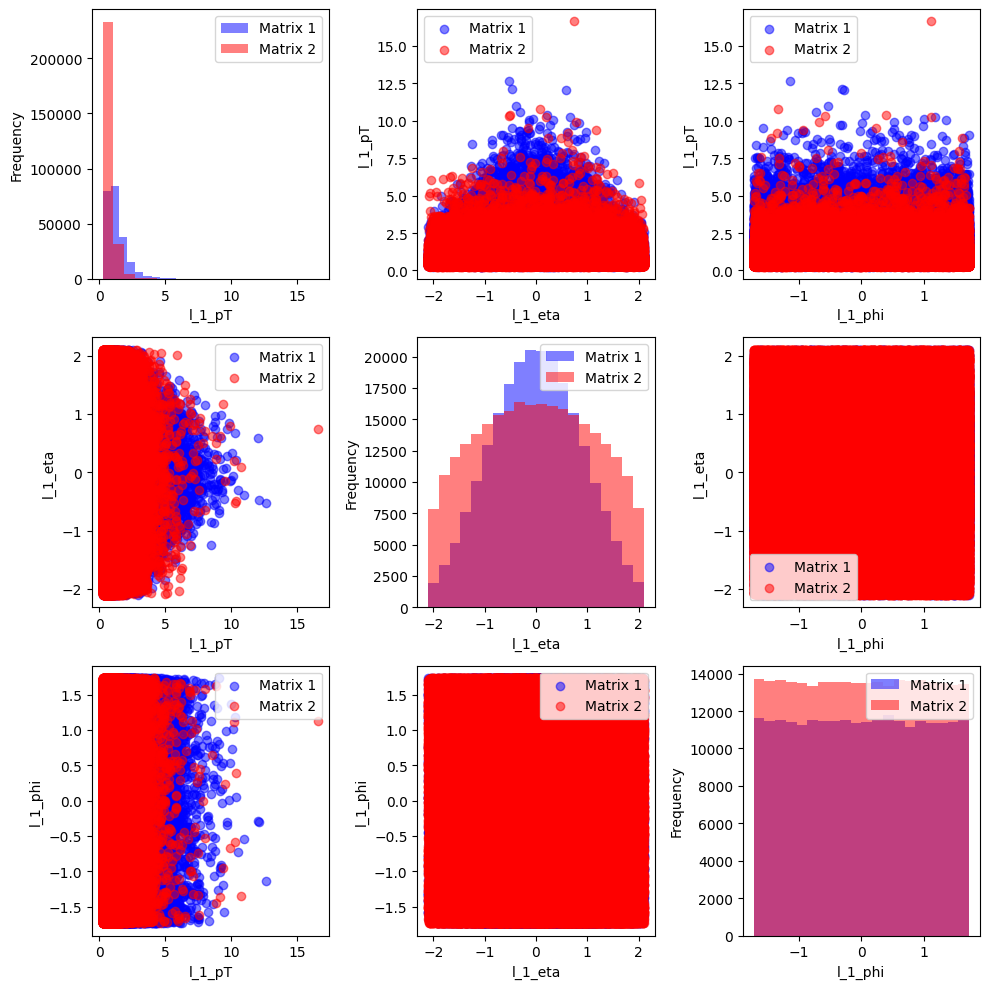

In [19]:
custom_pairplot(df_sig2, df_bkg2, vars = ['l_1_pT',	'l_1_eta',	'l_1_phi'])
#custom_pairplot(df_sig2, df_bkg2, vars = ['l_2_pT',	'l_2_eta',	'l_2_phi'])
#custom_pairplot(df_sig2, df_bkg2, vars = ['MET',	'MET_phi',	'MET_rel'])
#custom_pairplot(df_sig2, df_bkg2, vars = ['axial_MET',	'M_R',	'M_TR_2'])
#custom_pairplot(df_sig2, df_bkg2, vars = ['R',	'MT2',	'S_R'])
#custom_pairplot(df_sig2, df_bkg2, vars = ['M_Delta_R',	'dPhi_r_b',	'cos_theta_r1'])

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

In [20]:
def custom_pairplot_b(matrix1, matrix2, vars=None, figsize=(10, 10), marker='o', color1='b', color2='r', alpha=0.5):

    if vars is None:                                                            # select numerical columns
        vars = matrix1.select_dtypes(include=['number']).columns.tolist()

    num_vars = len(vars)

    fig, axes = plt.subplots(num_vars, num_vars, figsize=figsize)               # Create subplots

    hists = {}                                                                   # Pre-compute histograms for speed
    for var in vars:
        counts1, bins1 = np.histogram(matrix1[var], bins=20)
        counts2, bins2 = np.histogram(matrix2[var], bins=20)
        hists[var] = (counts1, bins1)
        hists[var] = (counts2, bins2)

    for i, var1 in enumerate(vars):                                             # loop over columns
        for j, var2 in enumerate(vars):
            if i == j:
                axes[i, j].hist(matrix1[var1], bins=hists[var1][1], color=color1, alpha=alpha)  # Add color to histogram
                axes[i, j].hist(matrix2[var1], bins=hists[var1][1], color=color2, alpha=alpha)
                axes[i, j].set_xlabel(var1)
                axes[i, j].set_ylabel('Frequency')
            else:
                axes[i, j].scatter(matrix1[var2], matrix1[var1], marker=marker, color=color1, alpha=alpha)
                axes[i, j].scatter(matrix2[var2], matrix2[var1], marker=marker, color=color2, alpha=alpha)
                axes[i, j].set_xlabel(var2)
                axes[i, j].set_ylabel(var1)

    plt.tight_layout()
    plt.show()

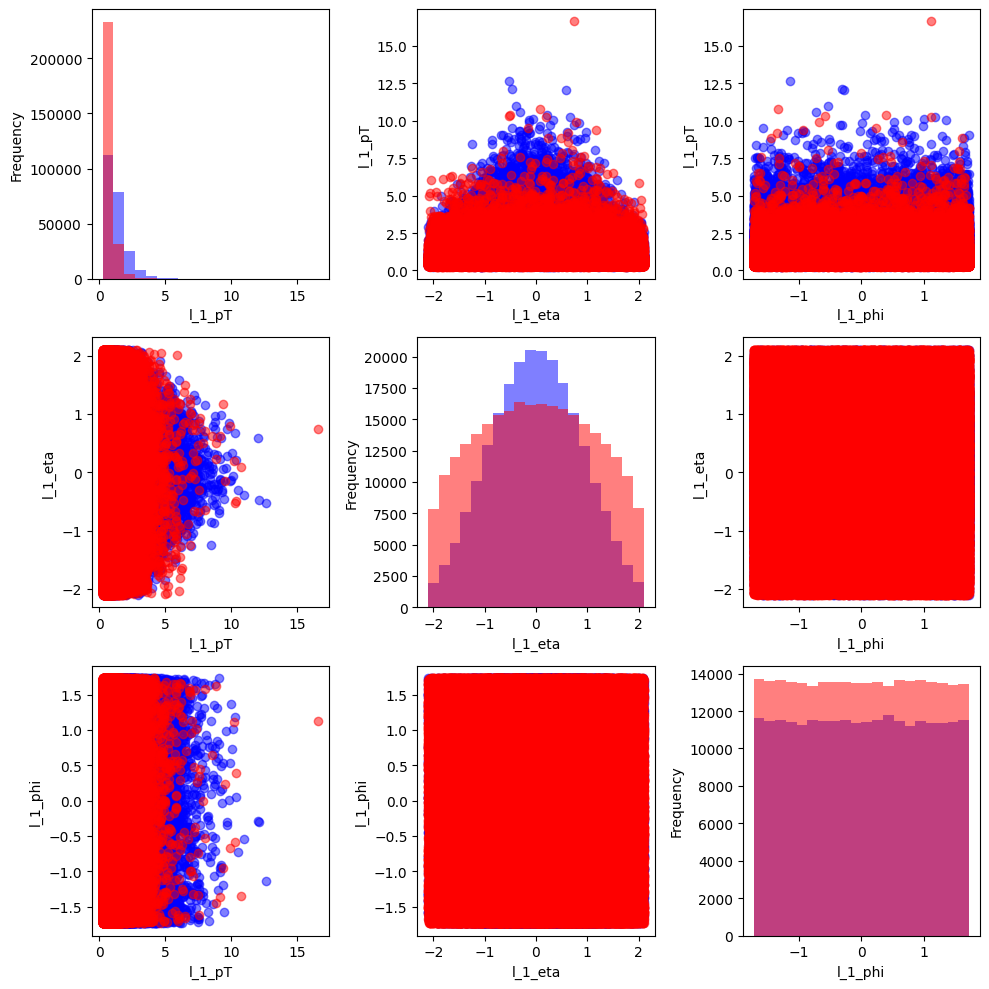

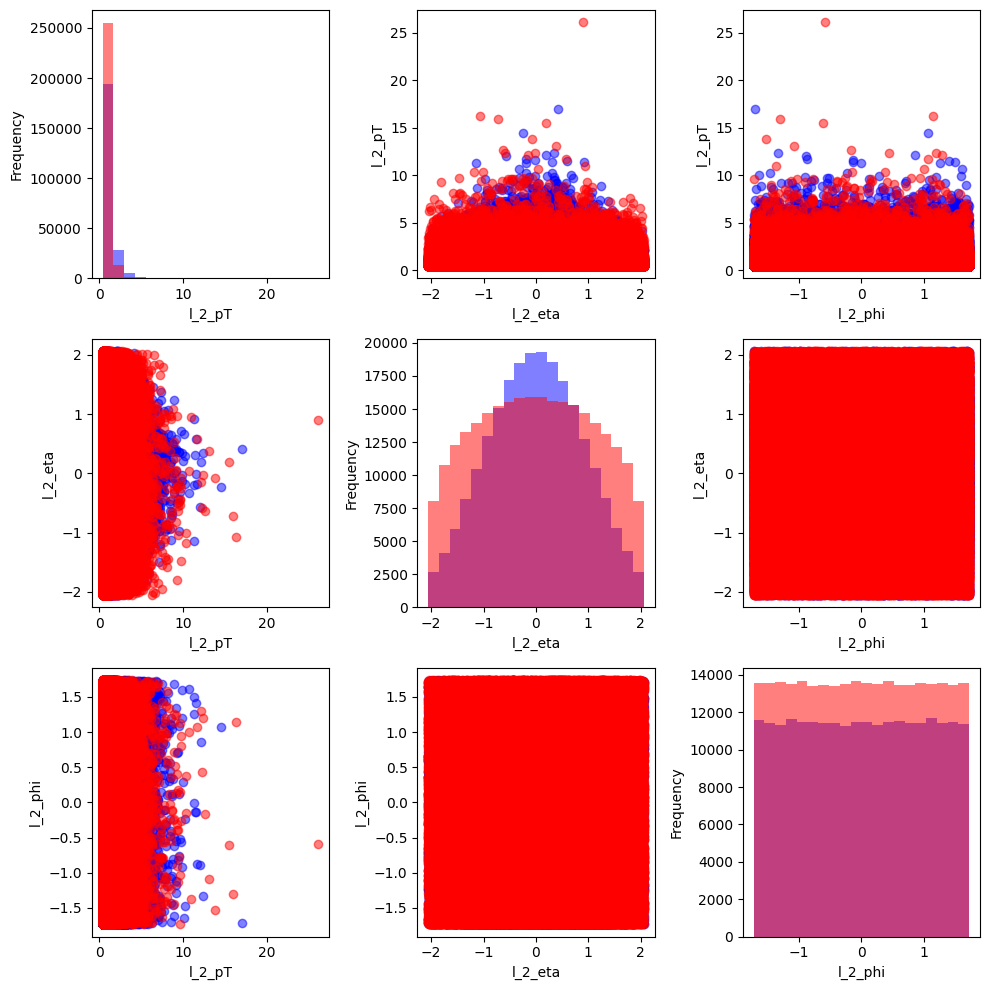

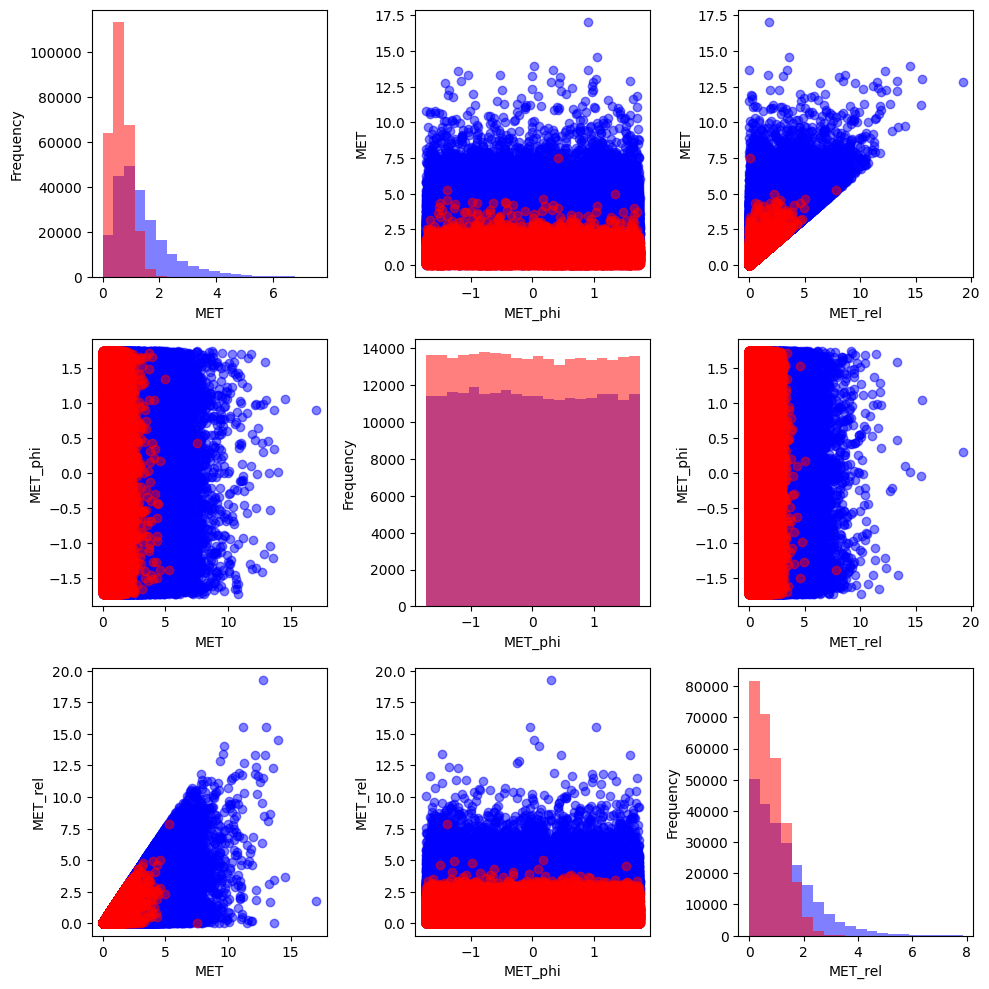

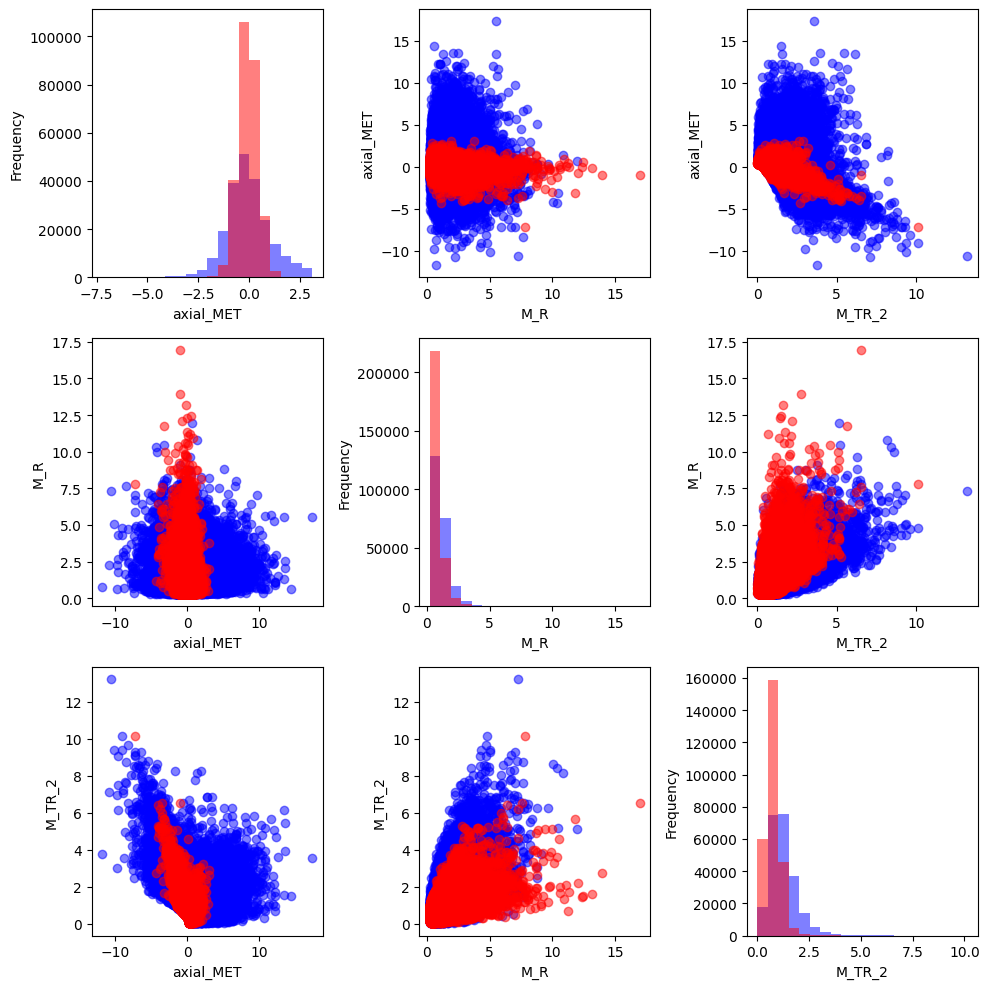

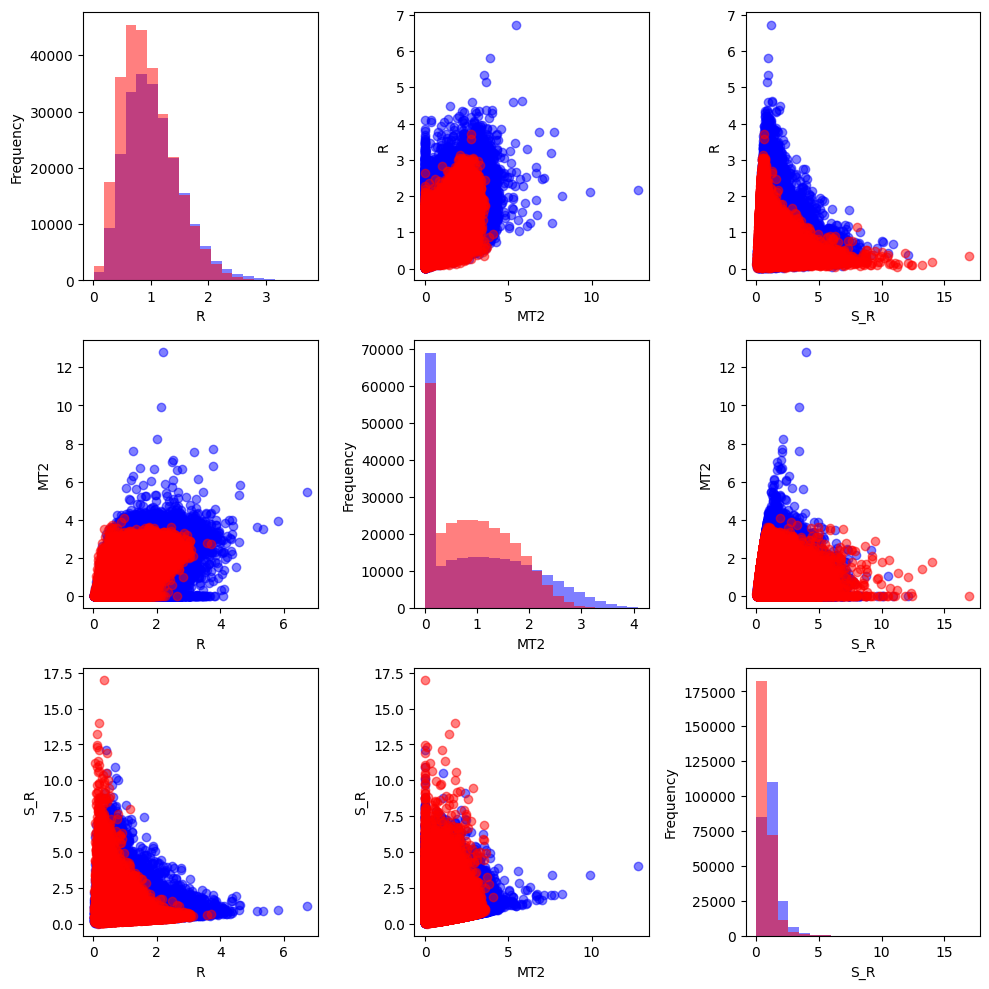

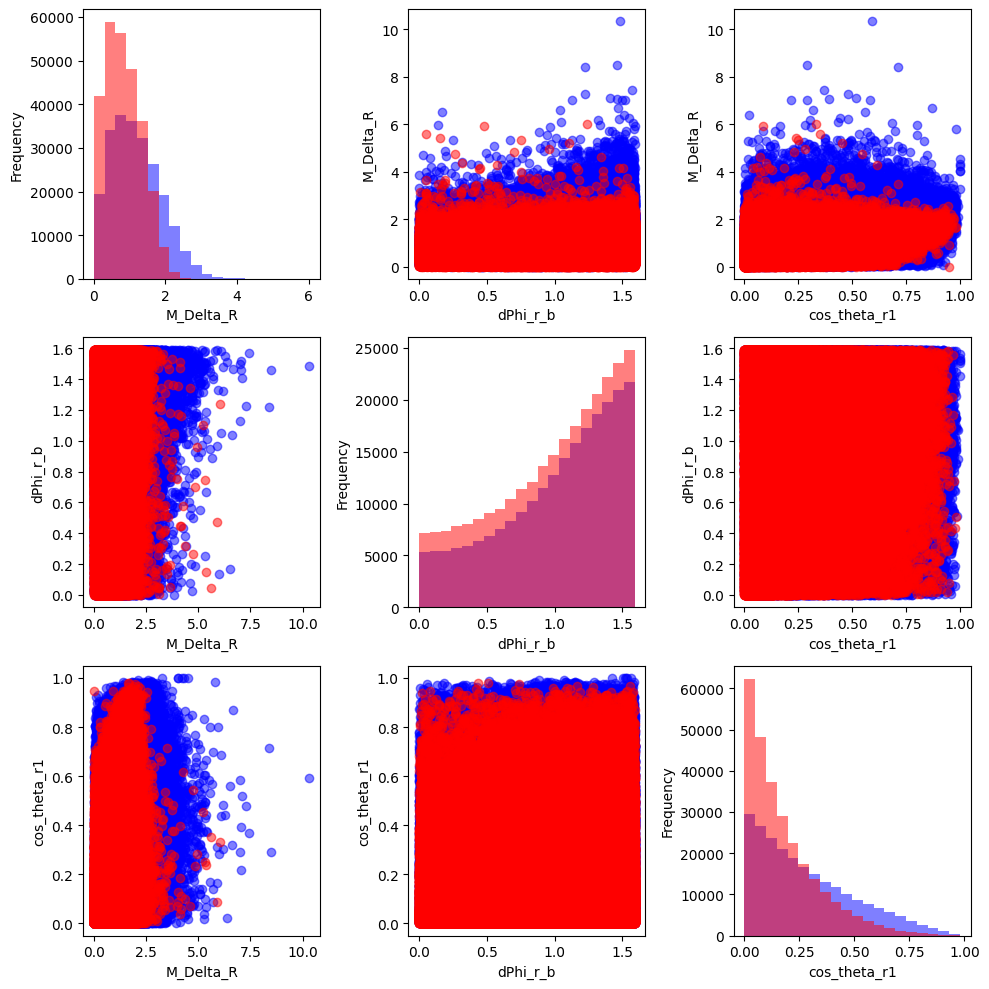

In [21]:
custom_pairplot_b(df_sig2, df_bkg2, vars = ['l_1_pT',	'l_1_eta',	'l_1_phi'])
custom_pairplot_b(df_sig2, df_bkg2, vars = ['l_2_pT',	'l_2_eta',	'l_2_phi'])
custom_pairplot_b(df_sig2, df_bkg2, vars = ['MET',	'MET_phi',	'MET_rel'])
custom_pairplot_b(df_sig2, df_bkg2, vars = ['axial_MET',	'M_R',	'M_TR_2'])
custom_pairplot_b(df_sig2, df_bkg2, vars = ['R',	'MT2',	'S_R'])
custom_pairplot_b(df_sig2, df_bkg2, vars = ['M_Delta_R',	'dPhi_r_b',	'cos_theta_r1'])

#### Part c
Which observables appear to be best for separating signal from background?

In [22]:
# cos_theta_r1, MET, and MET_rel

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate).

In [23]:
#!pip install tabulate

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

In [24]:
## RawNames: low level
## FeatureNames: High level
low_l = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_l = ['axial_MET', 'S_R', 'MT2', 'M_Delta_R', 'MET_rel', 'R', 'cos_theta_r1', 'M_TR_2', 'M_R', 'dPhi_r_b']
all_l=low_l+high_l

# all features
all_cov = np.cov(df[all_l], rowvar=False)
all_corr = np.corrcoef(df[all_l], rowvar=False)

# low level features
low_cov = np.cov(df[low_l], rowvar=False)
low_corr = np.corrcoef(df[low_l], rowvar=False)

# high level features
high_cov = np.cov(df[high_l], rowvar=False)
high_corr = np.corrcoef(df[high_l], rowvar=False)


print("Covariance Matrix (All Features):\n", all_cov)
print("\nCorrelation Matrix (All Features):\n", all_corr)

print("\n\nCovariance Matrix (Low Level):\n", low_cov)
print("\nCorrelation Matrix (Low Level):\n", low_corr)

print("\n\nCovariance Matrix (High Level):\n", high_cov)
print("\nCorrelation Matrix (High Level):\n", high_corr)

Covariance Matrix (All Features):
 [[ 4.72428126e-01 -2.62666897e-04 -2.29060618e-04  3.07887443e-01
  -3.02456872e-04  2.27164310e-04  2.30950772e-01 -6.76375484e-04
  -1.25117429e-02  3.46283105e-01 -1.27781651e-02  9.80831420e-02
   9.85665087e-02 -5.92849382e-02  2.25170535e-02  2.90830895e-01
   3.68084648e-01 -4.70231189e-02]
 [-2.62666897e-04  1.00622400e+00  3.21599952e-04 -3.77895911e-04
   4.05877394e-01  2.97083862e-04 -5.57684419e-04 -5.40623754e-04
  -4.97511845e-04 -2.81414480e-04 -1.57618075e-04 -5.04145408e-04
  -4.96645666e-04  1.27738268e-04  1.45749083e-04 -2.65899836e-04
  -3.08116876e-04  7.96492827e-05]
 [-2.29060618e-04  3.21599952e-04  1.00334220e+00 -1.28546630e-04
   6.41115931e-04 -2.68130132e-01  1.20012378e-03 -1.84183886e-01
  -1.96469455e-03  4.49583619e-05  1.75405466e-03  1.31238252e-03
   1.52891120e-03  8.76412682e-04  2.99499583e-04  8.37778126e-04
  -1.99692758e-04  9.53611330e-04]
 [ 3.07887443e-01 -3.77895911e-04 -1.28546630e-04  4.28003791e-01
  

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

In [25]:
from IPython.display import HTML
import tabulate

print("All Covariance - Low Level and High Level Features")
display(HTML(tabulate.tabulate(all_cov, tablefmt='html', headers=all_l, showindex=all_l)))

print(" \n")

print("All Correlation - Low Level and High Level Features")
display(HTML(tabulate.tabulate(all_corr, tablefmt='html', headers=all_l, showindex=all_l)))


All Covariance - Low Level and High Level Features


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,axial_MET,S_R,MT2,M_Delta_R,MET_rel,R,cos_theta_r1,M_TR_2,M_R,dPhi_r_b
l_1_pT,0.472428,-0.000262667,-0.000229061,0.307887,-0.000302457,0.000227164,0.230951,-0.000676375,-0.0125117,0.346283,-0.0127782,0.0980831,0.0985665,-0.0592849,0.0225171,0.290831,0.368085,-0.0470231
l_1_eta,-0.000262667,1.00622,0.0003216,-0.000377896,0.405877,0.000297084,-0.000557684,-0.000540624,-0.000497512,-0.000281414,-0.000157618,-0.000504145,-0.000496646,0.000127738,0.000145749,-0.0002659,-0.000308117,7.96493e-05
l_1_phi,-0.000229061,0.0003216,1.00334,-0.000128547,0.000641116,-0.26813,0.00120012,-0.184184,-0.00196469,4.49584e-05,0.00175405,0.00131238,0.00152891,0.000876413,0.0002995,0.000837778,-0.000199693,0.000953611
l_2_pT,0.307887,-0.000377896,-0.000128547,0.428004,-0.000454288,0.000114726,0.079704,-0.00138807,0.0497971,0.324622,-0.0691387,0.00555216,-0.00225873,-0.0993157,-0.0277963,0.164385,0.328115,-0.0041175
l_2_eta,-0.000302457,0.405877,0.000641116,-0.000454288,1.00569,-6.47266e-05,5.11899e-05,-0.000125592,-0.000170132,-0.000553613,-9.06262e-05,-0.000214547,0.000129885,0.000253423,0.000198699,-0.000167207,-0.000548914,-5.15597e-05
l_2_phi,0.000227164,0.000297084,-0.26813,0.000114726,-6.47266e-05,1.00326,4.32091e-06,-0.0344684,-9.13545e-05,0.000383544,0.00124351,0.000496384,0.000214381,0.00023464,-0.000198602,0.000288007,0.000286821,0.000243671
MET,0.230951,-0.000557684,0.00120012,0.079704,5.11899e-05,4.32091e-06,0.761933,-0.00162175,0.144805,0.16733,0.156388,0.316608,0.548358,0.18855,0.0732584,0.368099,0.145918,0.145279
MET_phi,-0.000676375,-0.000540624,-0.184184,-0.00138807,-0.000125592,-0.0344684,-0.00162175,1.00331,-0.000953142,-0.00114068,0.000505462,-0.000398585,-0.00291959,-0.000163381,5.77751e-05,-0.000842059,-0.000975646,-0.00132321
axial_MET,-0.0125117,-0.000497512,-0.00196469,0.0497971,-0.000170132,-9.13545e-05,0.144805,-0.000953142,1.00319,-0.0434172,-0.460312,-0.234103,-0.125273,-0.18164,-0.0541256,-0.188739,0.0151046,-0.0262092
S_R,0.346283,-0.000281414,4.49584e-05,0.324622,-0.000553613,0.000383544,0.16733,-0.00114068,-0.0434172,0.385289,-0.0111659,0.0961442,0.0824171,-0.0834283,-0.0102231,0.230448,0.383059,-0.00363167


 

All Correlation - Low Level and High Level Features


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,axial_MET,S_R,MT2,M_Delta_R,MET_rel,R,cos_theta_r1,M_TR_2,M_R,dPhi_r_b
l_1_pT,1,-0.000380969,-0.000332704,0.6847,-0.000438798,0.000329962,0.38494,-0.000982431,-0.0181743,0.811653,-0.0216362,0.228773,0.161098,-0.18319,0.166311,0.724394,0.851602,-0.156878
l_1_eta,-0.000380969,1,0.000320069,-0.000575839,0.403475,0.000295681,-0.000636917,-0.000538059,-0.000495182,-0.000451966,-0.000182869,-0.000805723,-0.000556196,0.000270458,0.000737625,-0.000453809,-0.000488455,0.000182076
l_1_phi,-0.000332704,0.000320069,1,-0.000196161,0.000638235,-0.267247,0.0013726,-0.183573,-0.0019583,7.2309e-05,0.00203798,0.00210045,0.00171469,0.00185828,0.00151792,0.00143188,-0.000317026,0.00218306
l_2_pT,0.6847,-0.000575839,-0.000196161,1,-0.000692431,0.000175077,0.139572,-0.00211822,0.0759957,0.799394,-0.122992,0.0136055,-0.00387855,-0.322419,-0.215695,0.430171,0.797551,-0.0144321
l_2_eta,-0.000438798,0.403475,0.000638235,-0.000692431,1,-6.44382e-05,5.84783e-05,-0.000125029,-0.00016938,-0.000889368,-0.000105173,-0.000342981,0.000145498,0.000536711,0.00100587,-0.000285448,-0.000870422,-0.000117896
l_2_phi,0.000329962,0.000295681,-0.267247,0.000175077,-6.44382e-05,1,4.94208e-06,-0.0343554,-9.10606e-05,0.000616899,0.00144484,0.000794488,0.000240441,0.000497531,-0.00100659,0.000492263,0.000455365,0.000557847
MET,0.38494,-0.000636917,0.0013726,0.139572,5.84783e-05,4.94208e-06,1,-0.00185485,0.165628,0.308832,0.20851,0.581489,0.705724,0.45877,0.426065,0.721952,0.265832,0.381648
MET_phi,-0.000982431,-0.000538059,-0.183573,-0.00211822,-0.000125029,-0.0343554,-0.00185485,1,-0.000950054,-0.00183464,0.000587288,-0.000637942,-0.0032744,-0.000346425,0.00029282,-0.00143922,-0.00154893,-0.00302921
axial_MET,-0.0181743,-0.000495182,-0.0019583,0.0759957,-0.00016938,-9.10606e-05,0.165628,-0.000950054,1,-0.0698356,-0.534862,-0.374708,-0.140506,-0.385164,-0.274339,-0.322606,0.0239815,-0.0600043
S_R,0.811653,-0.000451966,7.2309e-05,0.799394,-0.000889368,0.000616899,0.308832,-0.00183464,-0.0698356,1,-0.0209354,0.248317,0.14916,-0.285461,-0.0836113,0.635598,0.98136,-0.0134163


In [26]:
# Display Covariance - Low Level Features
print("Covariance - Low Level Features")
display(HTML(tabulate.tabulate(low_cov, tablefmt='html', headers=low_l, showindex=low_l)))

print(" \n")

# Display Correlation - Low Level Features
print("Correlation - Low Level Features")
display(HTML(tabulate.tabulate(low_corr, tablefmt='html', headers=low_l, showindex=low_l)))

Covariance - Low Level Features


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.472428,-0.000262667,-0.000229061,0.307887,-0.000302457,0.000227164,0.230951,-0.000676375
l_1_eta,-0.000262667,1.00622,0.0003216,-0.000377896,0.405877,0.000297084,-0.000557684,-0.000540624
l_1_phi,-0.000229061,0.0003216,1.00334,-0.000128547,0.000641116,-0.26813,0.00120012,-0.184184
l_2_pT,0.307887,-0.000377896,-0.000128547,0.428004,-0.000454288,0.000114726,0.079704,-0.00138807
l_2_eta,-0.000302457,0.405877,0.000641116,-0.000454288,1.00569,-6.47266e-05,5.11899e-05,-0.000125592
l_2_phi,0.000227164,0.000297084,-0.26813,0.000114726,-6.47266e-05,1.00326,4.32091e-06,-0.0344684
MET,0.230951,-0.000557684,0.00120012,0.079704,5.11899e-05,4.32091e-06,0.761933,-0.00162175
MET_phi,-0.000676375,-0.000540624,-0.184184,-0.00138807,-0.000125592,-0.0344684,-0.00162175,1.00331


 

Correlation - Low Level Features


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.000380969,-0.000332704,0.6847,-0.000438798,0.000329962,0.38494,-0.000982431
l_1_eta,-0.000380969,1,0.000320069,-0.000575839,0.403475,0.000295681,-0.000636917,-0.000538059
l_1_phi,-0.000332704,0.000320069,1,-0.000196161,0.000638235,-0.267247,0.0013726,-0.183573
l_2_pT,0.6847,-0.000575839,-0.000196161,1,-0.000692431,0.000175077,0.139572,-0.00211822
l_2_eta,-0.000438798,0.403475,0.000638235,-0.000692431,1,-6.44382e-05,5.84783e-05,-0.000125029
l_2_phi,0.000329962,0.000295681,-0.267247,0.000175077,-6.44382e-05,1,4.94208e-06,-0.0343554
MET,0.38494,-0.000636917,0.0013726,0.139572,5.84783e-05,4.94208e-06,1,-0.00185485
MET_phi,-0.000982431,-0.000538059,-0.183573,-0.00211822,-0.000125029,-0.0343554,-0.00185485,1


In [27]:
##(high_cov)
print("Covariance - Low Level Features")
display(HTML(tabulate.tabulate(high_cov, tablefmt='html', headers=high_l, showindex=high_l)))

print(" \n")

##(high_corr)
print("Correlation - Low Level Features")
display(HTML(tabulate.tabulate(high_corr, tablefmt='html', headers=high_l, showindex=high_l)))

Covariance - Low Level Features


,axial_MET,S_R,MT2,M_Delta_R,MET_rel,R,cos_theta_r1,M_TR_2,M_R,dPhi_r_b
axial_MET,1.00319,-0.0434172,-0.460312,-0.234103,-0.125273,-0.18164,-0.0541256,-0.188739,0.0151046,-0.0262092
S_R,-0.0434172,0.385289,-0.0111659,0.0961442,0.0824171,-0.0834283,-0.0102231,0.230448,0.383059,-0.00363167
MT2,-0.460312,-0.0111659,0.738309,0.433327,0.410022,0.232203,0.0445295,0.189498,-0.0366234,0.0211701
M_Delta_R,-0.234103,0.0961442,0.433327,0.389086,0.415675,0.165647,0.0392001,0.242487,0.0742776,0.0423863
MET_rel,-0.125273,0.0824171,0.410022,0.415675,0.792397,0.249511,0.055605,0.303346,0.043706,0.146597
R,-0.18164,-0.0834283,0.232203,0.165647,0.249511,0.221691,0.0581794,0.104464,-0.112922,0.087129
cos_theta_r1,-0.0541256,-0.0102231,0.0445295,0.0392001,0.055605,0.0581794,0.0388013,0.0519458,-0.0141941,0.00912875
M_TR_2,-0.188739,0.230448,0.189498,0.242487,0.303346,0.104464,0.0519458,0.341189,0.212154,0.0581329
M_R,0.0151046,0.383059,-0.0366234,0.0742776,0.043706,-0.112922,-0.0141941,0.212154,0.395446,-0.0291322
dPhi_r_b,-0.0262092,-0.00363167,0.0211701,0.0423863,0.146597,0.087129,0.00912875,0.0581329,-0.0291322,0.190179


 

Correlation - Low Level Features


,axial_MET,S_R,MT2,M_Delta_R,MET_rel,R,cos_theta_r1,M_TR_2,M_R,dPhi_r_b
axial_MET,1,-0.0698356,-0.534862,-0.374708,-0.140506,-0.385164,-0.274339,-0.322606,0.0239815,-0.0600043
S_R,-0.0698356,1,-0.0209354,0.248317,0.14916,-0.285461,-0.0836113,0.635598,0.98136,-0.0134163
MT2,-0.534862,-0.0209354,1,0.808488,0.536064,0.573951,0.263091,0.377562,-0.0677791,0.0564966
M_Delta_R,-0.374708,0.248317,0.808488,1,0.748617,0.564009,0.319037,0.665531,0.189362,0.155819
MET_rel,-0.140506,0.14916,0.536064,0.748617,1,0.595311,0.317117,0.583403,0.0780776,0.377634
R,-0.385164,-0.285461,0.573951,0.564009,0.595311,1,0.627296,0.379836,-0.381384,0.424334
cos_theta_r1,-0.274339,-0.0836113,0.263091,0.319037,0.317117,0.627296,1,0.451471,-0.114588,0.106269
M_TR_2,-0.322606,0.635598,0.377562,0.665531,0.583403,0.379836,0.451471,1,0.577579,0.228214
M_R,0.0239815,0.98136,-0.0677791,0.189362,0.0780776,-0.381384,-0.114588,0.577579,1,-0.106231
dPhi_r_b,-0.0600043,-0.0134163,0.0564966,0.155819,0.377634,0.424334,0.106269,0.228214,-0.106231,1


In [28]:
# Display Covariance - High Level Features
print("Covariance - High Level Features")
display(HTML(tabulate.tabulate(high_cov, tablefmt='html', headers=high_l, showindex=high_l)))

print(" \n")

# Display Correlation - High Level Features
print("Correlation - High Level Features")
display(HTML(tabulate.tabulate(high_corr, tablefmt='html', headers=high_l, showindex=high_l)))

Covariance - High Level Features


,axial_MET,S_R,MT2,M_Delta_R,MET_rel,R,cos_theta_r1,M_TR_2,M_R,dPhi_r_b
axial_MET,1.00319,-0.0434172,-0.460312,-0.234103,-0.125273,-0.18164,-0.0541256,-0.188739,0.0151046,-0.0262092
S_R,-0.0434172,0.385289,-0.0111659,0.0961442,0.0824171,-0.0834283,-0.0102231,0.230448,0.383059,-0.00363167
MT2,-0.460312,-0.0111659,0.738309,0.433327,0.410022,0.232203,0.0445295,0.189498,-0.0366234,0.0211701
M_Delta_R,-0.234103,0.0961442,0.433327,0.389086,0.415675,0.165647,0.0392001,0.242487,0.0742776,0.0423863
MET_rel,-0.125273,0.0824171,0.410022,0.415675,0.792397,0.249511,0.055605,0.303346,0.043706,0.146597
R,-0.18164,-0.0834283,0.232203,0.165647,0.249511,0.221691,0.0581794,0.104464,-0.112922,0.087129
cos_theta_r1,-0.0541256,-0.0102231,0.0445295,0.0392001,0.055605,0.0581794,0.0388013,0.0519458,-0.0141941,0.00912875
M_TR_2,-0.188739,0.230448,0.189498,0.242487,0.303346,0.104464,0.0519458,0.341189,0.212154,0.0581329
M_R,0.0151046,0.383059,-0.0366234,0.0742776,0.043706,-0.112922,-0.0141941,0.212154,0.395446,-0.0291322
dPhi_r_b,-0.0262092,-0.00363167,0.0211701,0.0423863,0.146597,0.087129,0.00912875,0.0581329,-0.0291322,0.190179


 

Correlation - High Level Features


,axial_MET,S_R,MT2,M_Delta_R,MET_rel,R,cos_theta_r1,M_TR_2,M_R,dPhi_r_b
axial_MET,1,-0.0698356,-0.534862,-0.374708,-0.140506,-0.385164,-0.274339,-0.322606,0.0239815,-0.0600043
S_R,-0.0698356,1,-0.0209354,0.248317,0.14916,-0.285461,-0.0836113,0.635598,0.98136,-0.0134163
MT2,-0.534862,-0.0209354,1,0.808488,0.536064,0.573951,0.263091,0.377562,-0.0677791,0.0564966
M_Delta_R,-0.374708,0.248317,0.808488,1,0.748617,0.564009,0.319037,0.665531,0.189362,0.155819
MET_rel,-0.140506,0.14916,0.536064,0.748617,1,0.595311,0.317117,0.583403,0.0780776,0.377634
R,-0.385164,-0.285461,0.573951,0.564009,0.595311,1,0.627296,0.379836,-0.381384,0.424334
cos_theta_r1,-0.274339,-0.0836113,0.263091,0.319037,0.317117,0.627296,1,0.451471,-0.114588,0.106269
M_TR_2,-0.322606,0.635598,0.377562,0.665531,0.583403,0.379836,0.451471,1,0.577579,0.228214
M_R,0.0239815,0.98136,-0.0677791,0.189362,0.0780776,-0.381384,-0.114588,0.577579,1,-0.106231
dPhi_r_b,-0.0600043,-0.0134163,0.0564966,0.155819,0.377634,0.424334,0.106269,0.228214,-0.106231,1


#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [29]:
def cov_corr(matrix1, low_level_features, high_level_features):

    # all features
    all_features = low_level_features+high_level_features
    all_cov = np.cov(df[all_features], rowvar=False)
    all_corr = np.corrcoef(df[all_features], rowvar=False)
        ##(all_cov)
    print("Covariance - Low Level and High Level Features")
    display(HTML(tabulate.tabulate(all_cov, tablefmt='html', headers=all_l, showindex=all_l)))
        ##(all_corr)
    print("Correlation - Low Level and High Level Features")
    display(HTML(tabulate.tabulate(all_corr, tablefmt='html', headers=all_l, showindex=all_l)))

    print(" \n")

    # low level features
    low_cov = np.cov(df[low_level_features], rowvar=False)
    low_corr = np.corrcoef(df[low_level_features], rowvar=False)
        ##(low_cov)
    print("Covariance - Low Level Features")
    display(HTML(tabulate.tabulate(low_cov, tablefmt='html', headers=low_l, showindex=low_l)))
        ##(low_corr)
    print("Correlation - Low Level Features")
    display(HTML(tabulate.tabulate(low_corr, tablefmt='html', headers=low_l, showindex=low_l)))

    print(" \n")

    # high level features
    high_cov = np.cov(df[high_level_features], rowvar=False)
    high_corr = np.corrcoef(df[high_level_features], rowvar=False)
        ##(high_cov)
    print("Covariance - High Level Features")
    display(HTML(tabulate.tabulate(high_cov, tablefmt='html', headers=high_l, showindex=high_l)))
        ##(high_corr)
    print("Correlation - High Level Features")
    display(HTML(tabulate.tabulate(high_corr, tablefmt='html', headers=high_l, showindex=high_l)))

In [30]:
low_l = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_l = ['axial_MET', 'S_R', 'MT2', 'M_Delta_R', 'MET_rel', 'R', 'cos_theta_r1', 'M_TR_2', 'M_R', 'dPhi_r_b']
cov_corr(df, low_l, high_l)

Covariance - Low Level and High Level Features


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,axial_MET,S_R,MT2,M_Delta_R,MET_rel,R,cos_theta_r1,M_TR_2,M_R,dPhi_r_b
l_1_pT,0.472428,-0.000262667,-0.000229061,0.307887,-0.000302457,0.000227164,0.230951,-0.000676375,-0.0125117,0.346283,-0.0127782,0.0980831,0.0985665,-0.0592849,0.0225171,0.290831,0.368085,-0.0470231
l_1_eta,-0.000262667,1.00622,0.0003216,-0.000377896,0.405877,0.000297084,-0.000557684,-0.000540624,-0.000497512,-0.000281414,-0.000157618,-0.000504145,-0.000496646,0.000127738,0.000145749,-0.0002659,-0.000308117,7.96493e-05
l_1_phi,-0.000229061,0.0003216,1.00334,-0.000128547,0.000641116,-0.26813,0.00120012,-0.184184,-0.00196469,4.49584e-05,0.00175405,0.00131238,0.00152891,0.000876413,0.0002995,0.000837778,-0.000199693,0.000953611
l_2_pT,0.307887,-0.000377896,-0.000128547,0.428004,-0.000454288,0.000114726,0.079704,-0.00138807,0.0497971,0.324622,-0.0691387,0.00555216,-0.00225873,-0.0993157,-0.0277963,0.164385,0.328115,-0.0041175
l_2_eta,-0.000302457,0.405877,0.000641116,-0.000454288,1.00569,-6.47266e-05,5.11899e-05,-0.000125592,-0.000170132,-0.000553613,-9.06262e-05,-0.000214547,0.000129885,0.000253423,0.000198699,-0.000167207,-0.000548914,-5.15597e-05
l_2_phi,0.000227164,0.000297084,-0.26813,0.000114726,-6.47266e-05,1.00326,4.32091e-06,-0.0344684,-9.13545e-05,0.000383544,0.00124351,0.000496384,0.000214381,0.00023464,-0.000198602,0.000288007,0.000286821,0.000243671
MET,0.230951,-0.000557684,0.00120012,0.079704,5.11899e-05,4.32091e-06,0.761933,-0.00162175,0.144805,0.16733,0.156388,0.316608,0.548358,0.18855,0.0732584,0.368099,0.145918,0.145279
MET_phi,-0.000676375,-0.000540624,-0.184184,-0.00138807,-0.000125592,-0.0344684,-0.00162175,1.00331,-0.000953142,-0.00114068,0.000505462,-0.000398585,-0.00291959,-0.000163381,5.77751e-05,-0.000842059,-0.000975646,-0.00132321
axial_MET,-0.0125117,-0.000497512,-0.00196469,0.0497971,-0.000170132,-9.13545e-05,0.144805,-0.000953142,1.00319,-0.0434172,-0.460312,-0.234103,-0.125273,-0.18164,-0.0541256,-0.188739,0.0151046,-0.0262092
S_R,0.346283,-0.000281414,4.49584e-05,0.324622,-0.000553613,0.000383544,0.16733,-0.00114068,-0.0434172,0.385289,-0.0111659,0.0961442,0.0824171,-0.0834283,-0.0102231,0.230448,0.383059,-0.00363167


Correlation - Low Level and High Level Features


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,axial_MET,S_R,MT2,M_Delta_R,MET_rel,R,cos_theta_r1,M_TR_2,M_R,dPhi_r_b
l_1_pT,1,-0.000380969,-0.000332704,0.6847,-0.000438798,0.000329962,0.38494,-0.000982431,-0.0181743,0.811653,-0.0216362,0.228773,0.161098,-0.18319,0.166311,0.724394,0.851602,-0.156878
l_1_eta,-0.000380969,1,0.000320069,-0.000575839,0.403475,0.000295681,-0.000636917,-0.000538059,-0.000495182,-0.000451966,-0.000182869,-0.000805723,-0.000556196,0.000270458,0.000737625,-0.000453809,-0.000488455,0.000182076
l_1_phi,-0.000332704,0.000320069,1,-0.000196161,0.000638235,-0.267247,0.0013726,-0.183573,-0.0019583,7.2309e-05,0.00203798,0.00210045,0.00171469,0.00185828,0.00151792,0.00143188,-0.000317026,0.00218306
l_2_pT,0.6847,-0.000575839,-0.000196161,1,-0.000692431,0.000175077,0.139572,-0.00211822,0.0759957,0.799394,-0.122992,0.0136055,-0.00387855,-0.322419,-0.215695,0.430171,0.797551,-0.0144321
l_2_eta,-0.000438798,0.403475,0.000638235,-0.000692431,1,-6.44382e-05,5.84783e-05,-0.000125029,-0.00016938,-0.000889368,-0.000105173,-0.000342981,0.000145498,0.000536711,0.00100587,-0.000285448,-0.000870422,-0.000117896
l_2_phi,0.000329962,0.000295681,-0.267247,0.000175077,-6.44382e-05,1,4.94208e-06,-0.0343554,-9.10606e-05,0.000616899,0.00144484,0.000794488,0.000240441,0.000497531,-0.00100659,0.000492263,0.000455365,0.000557847
MET,0.38494,-0.000636917,0.0013726,0.139572,5.84783e-05,4.94208e-06,1,-0.00185485,0.165628,0.308832,0.20851,0.581489,0.705724,0.45877,0.426065,0.721952,0.265832,0.381648
MET_phi,-0.000982431,-0.000538059,-0.183573,-0.00211822,-0.000125029,-0.0343554,-0.00185485,1,-0.000950054,-0.00183464,0.000587288,-0.000637942,-0.0032744,-0.000346425,0.00029282,-0.00143922,-0.00154893,-0.00302921
axial_MET,-0.0181743,-0.000495182,-0.0019583,0.0759957,-0.00016938,-9.10606e-05,0.165628,-0.000950054,1,-0.0698356,-0.534862,-0.374708,-0.140506,-0.385164,-0.274339,-0.322606,0.0239815,-0.0600043
S_R,0.811653,-0.000451966,7.2309e-05,0.799394,-0.000889368,0.000616899,0.308832,-0.00183464,-0.0698356,1,-0.0209354,0.248317,0.14916,-0.285461,-0.0836113,0.635598,0.98136,-0.0134163


 

Covariance - Low Level Features


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.472428,-0.000262667,-0.000229061,0.307887,-0.000302457,0.000227164,0.230951,-0.000676375
l_1_eta,-0.000262667,1.00622,0.0003216,-0.000377896,0.405877,0.000297084,-0.000557684,-0.000540624
l_1_phi,-0.000229061,0.0003216,1.00334,-0.000128547,0.000641116,-0.26813,0.00120012,-0.184184
l_2_pT,0.307887,-0.000377896,-0.000128547,0.428004,-0.000454288,0.000114726,0.079704,-0.00138807
l_2_eta,-0.000302457,0.405877,0.000641116,-0.000454288,1.00569,-6.47266e-05,5.11899e-05,-0.000125592
l_2_phi,0.000227164,0.000297084,-0.26813,0.000114726,-6.47266e-05,1.00326,4.32091e-06,-0.0344684
MET,0.230951,-0.000557684,0.00120012,0.079704,5.11899e-05,4.32091e-06,0.761933,-0.00162175
MET_phi,-0.000676375,-0.000540624,-0.184184,-0.00138807,-0.000125592,-0.0344684,-0.00162175,1.00331


Correlation - Low Level Features


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.000380969,-0.000332704,0.6847,-0.000438798,0.000329962,0.38494,-0.000982431
l_1_eta,-0.000380969,1,0.000320069,-0.000575839,0.403475,0.000295681,-0.000636917,-0.000538059
l_1_phi,-0.000332704,0.000320069,1,-0.000196161,0.000638235,-0.267247,0.0013726,-0.183573
l_2_pT,0.6847,-0.000575839,-0.000196161,1,-0.000692431,0.000175077,0.139572,-0.00211822
l_2_eta,-0.000438798,0.403475,0.000638235,-0.000692431,1,-6.44382e-05,5.84783e-05,-0.000125029
l_2_phi,0.000329962,0.000295681,-0.267247,0.000175077,-6.44382e-05,1,4.94208e-06,-0.0343554
MET,0.38494,-0.000636917,0.0013726,0.139572,5.84783e-05,4.94208e-06,1,-0.00185485
MET_phi,-0.000982431,-0.000538059,-0.183573,-0.00211822,-0.000125029,-0.0343554,-0.00185485,1


 

Covariance - High Level Features


,axial_MET,S_R,MT2,M_Delta_R,MET_rel,R,cos_theta_r1,M_TR_2,M_R,dPhi_r_b
axial_MET,1.00319,-0.0434172,-0.460312,-0.234103,-0.125273,-0.18164,-0.0541256,-0.188739,0.0151046,-0.0262092
S_R,-0.0434172,0.385289,-0.0111659,0.0961442,0.0824171,-0.0834283,-0.0102231,0.230448,0.383059,-0.00363167
MT2,-0.460312,-0.0111659,0.738309,0.433327,0.410022,0.232203,0.0445295,0.189498,-0.0366234,0.0211701
M_Delta_R,-0.234103,0.0961442,0.433327,0.389086,0.415675,0.165647,0.0392001,0.242487,0.0742776,0.0423863
MET_rel,-0.125273,0.0824171,0.410022,0.415675,0.792397,0.249511,0.055605,0.303346,0.043706,0.146597
R,-0.18164,-0.0834283,0.232203,0.165647,0.249511,0.221691,0.0581794,0.104464,-0.112922,0.087129
cos_theta_r1,-0.0541256,-0.0102231,0.0445295,0.0392001,0.055605,0.0581794,0.0388013,0.0519458,-0.0141941,0.00912875
M_TR_2,-0.188739,0.230448,0.189498,0.242487,0.303346,0.104464,0.0519458,0.341189,0.212154,0.0581329
M_R,0.0151046,0.383059,-0.0366234,0.0742776,0.043706,-0.112922,-0.0141941,0.212154,0.395446,-0.0291322
dPhi_r_b,-0.0262092,-0.00363167,0.0211701,0.0423863,0.146597,0.087129,0.00912875,0.0581329,-0.0291322,0.190179


Correlation - High Level Features


,axial_MET,S_R,MT2,M_Delta_R,MET_rel,R,cos_theta_r1,M_TR_2,M_R,dPhi_r_b
axial_MET,1,-0.0698356,-0.534862,-0.374708,-0.140506,-0.385164,-0.274339,-0.322606,0.0239815,-0.0600043
S_R,-0.0698356,1,-0.0209354,0.248317,0.14916,-0.285461,-0.0836113,0.635598,0.98136,-0.0134163
MT2,-0.534862,-0.0209354,1,0.808488,0.536064,0.573951,0.263091,0.377562,-0.0677791,0.0564966
M_Delta_R,-0.374708,0.248317,0.808488,1,0.748617,0.564009,0.319037,0.665531,0.189362,0.155819
MET_rel,-0.140506,0.14916,0.536064,0.748617,1,0.595311,0.317117,0.583403,0.0780776,0.377634
R,-0.385164,-0.285461,0.573951,0.564009,0.595311,1,0.627296,0.379836,-0.381384,0.424334
cos_theta_r1,-0.274339,-0.0836113,0.263091,0.319037,0.317117,0.627296,1,0.451471,-0.114588,0.106269
M_TR_2,-0.322606,0.635598,0.377562,0.665531,0.583403,0.379836,0.451471,1,0.577579,0.228214
M_R,0.0239815,0.98136,-0.0677791,0.189362,0.0780776,-0.381384,-0.114588,0.577579,1,-0.106231
dPhi_r_b,-0.0600043,-0.0134163,0.0564966,0.155819,0.377634,0.424334,0.106269,0.228214,-0.106231,1


Hint: Example code for embedding a `tabulate` table into a notebook:

In [31]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal:

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable.

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [32]:
### 5.1:

# 1. $x > x_c$: Signal is greater than background: l_1_pT l_2_pT, MET, MET_rel, M_R, M_TR_2, R, MT2, S_R, M_Delta_R, cos_theta_r1
# 2. $x < x_c$: Signal is less than background: None.
# 3. $|x - \mu| > x_c$: Signal is wider than background: axial_MET
# 4. $|x - \mu| < x_c$: Signal is skinnier than background: l_1_eta, l_2_eta

# Little difference between signal and background: l_1_phi,	l_2_phi, MET_phi, dPhi_r_b

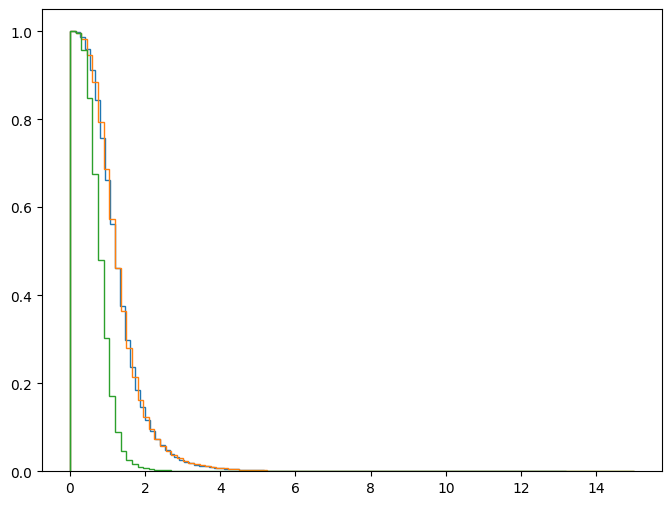

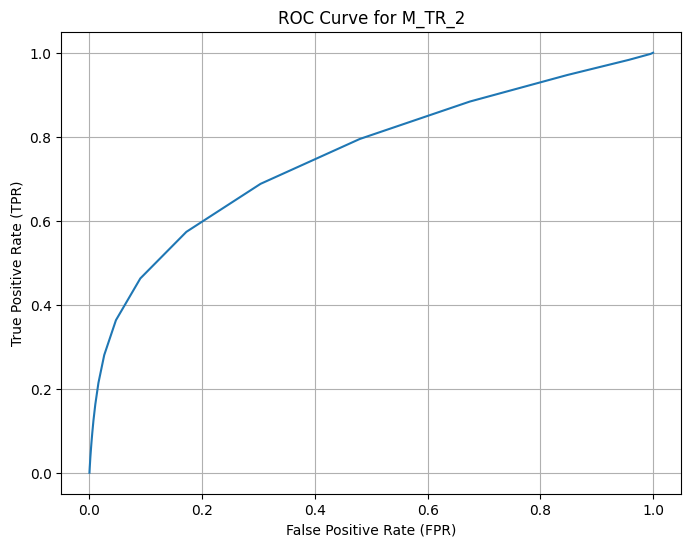

In [35]:
### 5.2

plt.figure(figsize=(8, 6))
_ = plt.hist(df_sig2["M_TR_2"], bins=100, histtype="step", cumulative=-1, density=True, label='Signal') # Plot the signal distribution

TPR, bins_sig, _ = plt.hist(df_sig["M_TR_2"], bins=100, histtype="step", cumulative=-1, density=True) # Computing true positive rate

FPR, _, _ = plt.hist(df_bkg["M_TR_2"], bins=bins_sig, histtype="step", cumulative=-1, density=True) # Computing false positive rate

plt.figure(figsize=(8, 6))                                                      # Plot ROC curve
plt.plot(FPR, TPR)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for M_TR_2')
plt.grid(True)
plt.show()

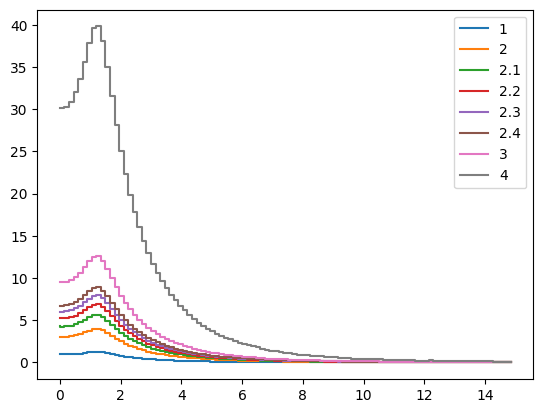

{'1': (9,
  3.6321277788923725,
  4.698005878683211,
  1.258447591175229,
  1.350293831230374),
 '2': (9,
  36.32127778892372,
  46.9800587868321,
  3.9795607040661367,
  1.350293831230374),
 '2.1': (9,
  72.64255557784745,
  93.9601175736642,
  5.627948719977353,
  1.350293831230374),
 '2.2': (9,
  108.96383336677117,
  140.9401763604963,
  6.892801331247122,
  1.350293831230374),
 '2.3': (9,
  145.2851111556949,
  187.9202351473284,
  7.959121408132273,
  1.350293831230374),
 '2.4': (9,
  181.6063889446186,
  234.90029393416052,
  8.898568254878805,
  1.350293831230374),
 '3': (9,
  363.2127778892372,
  469.80058786832103,
  12.584475911752289,
  1.350293831230374),
 '4': (9,
  3632.127778892372,
  4698.0058786832105,
  39.795607040661366,
  1.350293831230374)}

In [36]:
### 5.3 taken from Farbin lecture 16

scenarios = { "1": (10,100),
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

def compare_significance(scenarios,log=False):
    max_sigs=dict()
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name)

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,
                        n_sig_expected_prime[max_i],
                        n_bkg_expected_prime[max_i],
                        sig[max_i],
                        bins_sig[max_i])

    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    return max_sigs

max_sigs = compare_significance(scenarios)
max_sigs

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c).

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [37]:
### 6.1

# Threshold value
threshold = 1.35029

# Boolean masks for selections
mask_MET = df_sig["MET"] > threshold
mask_M_TR_2 = df_sig["M_TR_2"] > threshold
mask_cos_theta_r1 = df_sig["cos_theta_r1"] > threshold


In [38]:
### 6.2

# Define the threshold value
threshold = 1.35029

# Boolean masks for selections
mask_MET = df_sig["MET"] > threshold
mask_M_TR_2 = df_sig["M_TR_2"] > threshold
mask_cos_theta_r1 = df_sig["cos_theta_r1"] > threshold

# Define a function to compute the significance
def compute_significance(N_S, N_B):
    return N_S / (N_S + N_B) ** 0.5

# Create a dictionary to store the results
cut_flow_results = {}

# Selections and computations for MET
N_S_MET = sum(mask_MET)
N_B_MET = sum(df_bkg["MET"] > threshold)
eff_S_MET = N_S_MET / len(df_sig)
eff_B_MET = N_B_MET / len(df_bkg)
sigma_S_MET = compute_significance(N_S_MET, N_B_MET)

# Store the results for MET
cut_flow_results['MET'] = {'Signal Efficiency': eff_S_MET,
                           'Background Efficiency': eff_B_MET,
                           'Number of Selected Signal Events': N_S_MET,
                           'Number of Selected Background Events': N_B_MET,
                           'Significance': sigma_S_MET}

# Selections and computations for M_TR_2
# Repeat the process for M_TR_2 and cos_theta_r1

# Display the results
import pandas as pd
cut_flow_df = pd.DataFrame(cut_flow_results)
print(cut_flow_df)


                                                MET
Background Efficiency                      0.035473
Number of Selected Background Events   96209.000000
Number of Selected Signal Events      916089.000000
Signal Efficiency                          0.400419
Significance                             910.507398


In [39]:
### 6.3

# 1. Identify Correlated Variables
# You may already have correlation matrices computed or you can compute them using pandas' corr() function.

# Example:
correlation_matrix = df_sig[['MET', 'M_TR_2', 'cos_theta_r1']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# 2. Apply Selection and Optimize for Second Observable
# Choose one observable as the primary selection criterion and apply the selection based on a threshold value.

# Example:
threshold = 1.35029
mask_MET = df_sig["MET"] > threshold
df_sig_selected_MET = df_sig[mask_MET]

# Optimize for a second observable by varying its threshold value and calculating the significance for each threshold.

# Example:
thresholds_M_TR_2 = [1.3, 1.4, 1.5]  # Example threshold values for M_TR_2
best_significance = -1
best_threshold_M_TR_2 = None

for threshold_M_TR_2 in thresholds_M_TR_2:
    mask_M_TR_2 = df_sig_selected_MET["M_TR_2"] > threshold_M_TR_2
    N_S = sum(mask_M_TR_2)
    N_B = sum(df_bkg["M_TR_2"] > threshold_M_TR_2)
    significance = compute_significance(N_S, N_B)
    if significance > best_significance:
        best_significance = significance
        best_threshold_M_TR_2 = threshold_M_TR_2

print("Best Threshold for M_TR_2:", best_threshold_M_TR_2)
print("Best Significance:", best_significance)

# 3. Change Selection Order and Compare Results
# Repeat the process by selecting on the second observable and optimizing for the first observable.

# Example:
# This is similar to the process above but with the selection and optimization order reversed.



Correlation Matrix:
                   MET    M_TR_2  cos_theta_r1
MET           1.000000  0.637331      0.368202
M_TR_2        0.637331  1.000000      0.431219
cos_theta_r1  0.368202  0.431219      1.000000
Best Threshold for M_TR_2: 1.3
Best Significance: 723.4716994766239


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



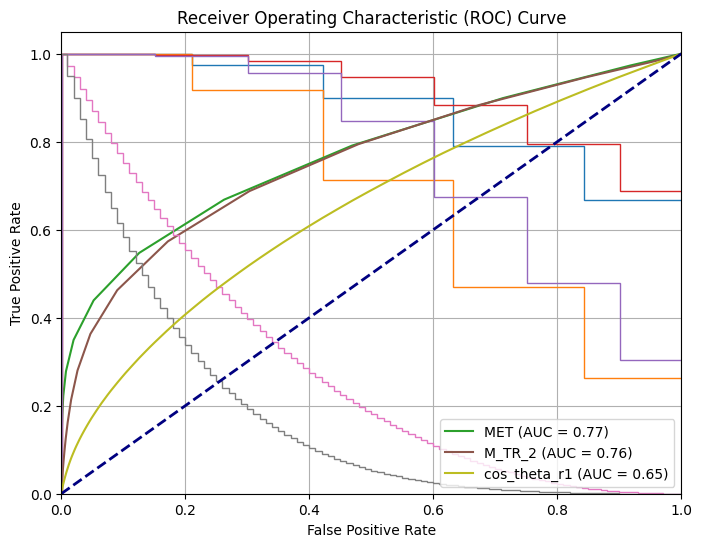

In [45]:
### 7.1

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve and compute AUC
def plot_roc_curve(df_sig, df_bkg, observables, bins=100, cumulative=-1, density=True, figsize=(8, 6), title=None):
    plt.figure(figsize=figsize)
    for observable in observables:
        # Compute ROC curve
        TPR, bins_sig, _ = plt.hist(df_sig[observable], bins=bins, histtype="step", cumulative=cumulative, density=density)
        FPR, _, _ = plt.hist(df_bkg[observable], bins=bins_sig, histtype="step", cumulative=cumulative, density=density)
        # Compute AUC
        roc_auc = auc(FPR, TPR)
        # Plot ROC curve
        plt.plot(FPR, TPR, label=f'{observable} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    if title:
        plt.title(title)
    plt.show()

# Call the function with the top 3 observables
top_observables = ['MET', 'M_TR_2', 'cos_theta_r1']
plot_roc_curve(df_sig, df_bkg, top_observables)


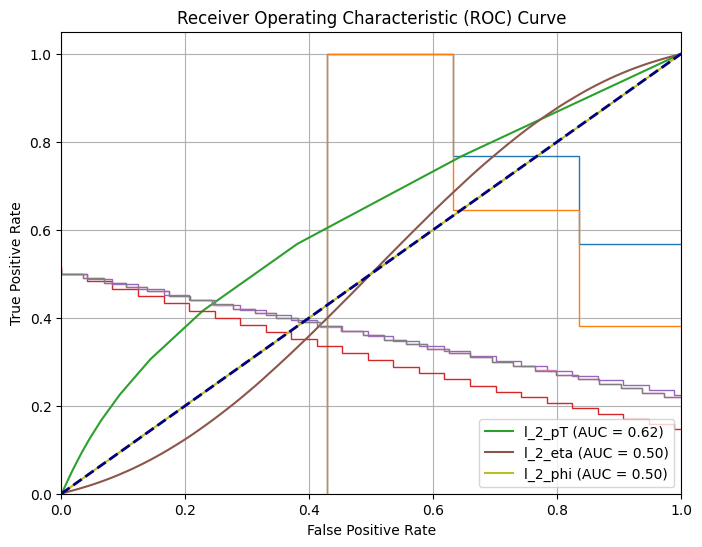

{'l_2_pT': {'Signal Efficiency': 0.25886310459663253, 'Background Efficiency': 0.11387179210175752, 'Number of Selected Signal Events': 592234, 'Number of Selected Background Events': 308840, 'Significance': 623.8973015317771}, 'l_2_eta': {'Signal Efficiency': 0.07100493175401812, 'Background Efficiency': 0.13562077345361082, 'Number of Selected Signal Events': 162447, 'Number of Selected Background Events': 367827, 'Significance': 223.08045857461715}, 'l_2_phi': {'Signal Efficiency': 0.11094239206023881, 'Background Efficiency': 0.1106094633343817, 'Number of Selected Signal Events': 253817, 'Number of Selected Background Events': 299992, 'Significance': 341.06778599050176}}


In [46]:
### 7.2

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(df_sig, df_bkg, features, bins=100, cumulative=-1, density=True, figsize=(8, 6), title=None):
    plt.figure(figsize=figsize)
    for feature in features:
        # Compute ROC curve
        TPR, bins_sig, _ = plt.hist(df_sig[feature], bins=bins, histtype="step", cumulative=cumulative, density=density)
        FPR, _, _ = plt.hist(df_bkg[feature], bins=bins_sig, histtype="step", cumulative=cumulative, density=density)
        # Compute AUC
        roc_auc = auc(FPR, TPR)
        # Plot ROC curve
        plt.plot(FPR, TPR, label=f'{feature} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    if title:
        plt.title(title)
    plt.show()

# Function to create cut-flow table
def create_cut_flow_table(df_sig, df_bkg, features, threshold):
    results = {}
    for feature in features:
        # Apply selection
        mask_sig = df_sig[feature] > threshold
        mask_bkg = df_bkg[feature] > threshold
        N_S = sum(mask_sig)
        N_B = sum(mask_bkg)
        # Compute efficiencies
        eff_S = N_S / len(df_sig)
        eff_B = N_B / len(df_bkg)
        # Compute significance
        significance = N_S / (N_S + N_B) ** 0.5
        # Store results
        results[feature] = {'Signal Efficiency': eff_S,
                            'Background Efficiency': eff_B,
                            'Number of Selected Signal Events': N_S,
                            'Number of Selected Background Events': N_B,
                            'Significance': significance}
    return results


features = ['l_2_pT', 'l_2_eta', 'l_2_phi']
plot_roc_curve(df_sig, df_bkg, features)
cut_flow_results = create_cut_flow_table(df_sig, df_bkg, features, threshold=1.35029)
print(cut_flow_results)


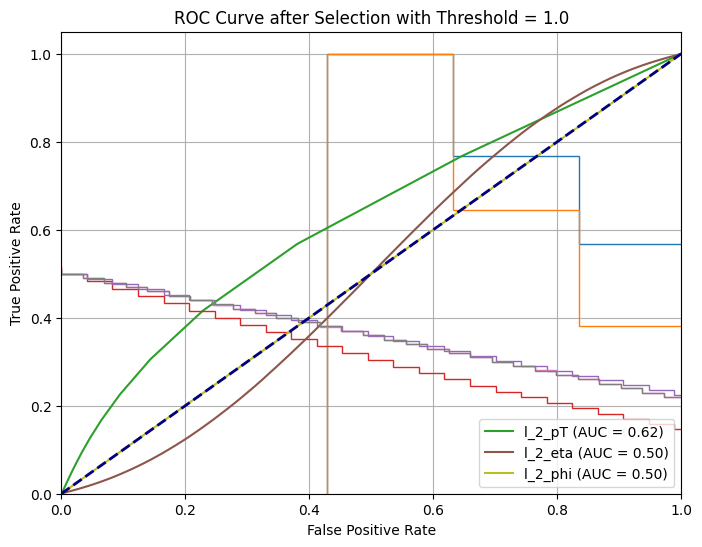

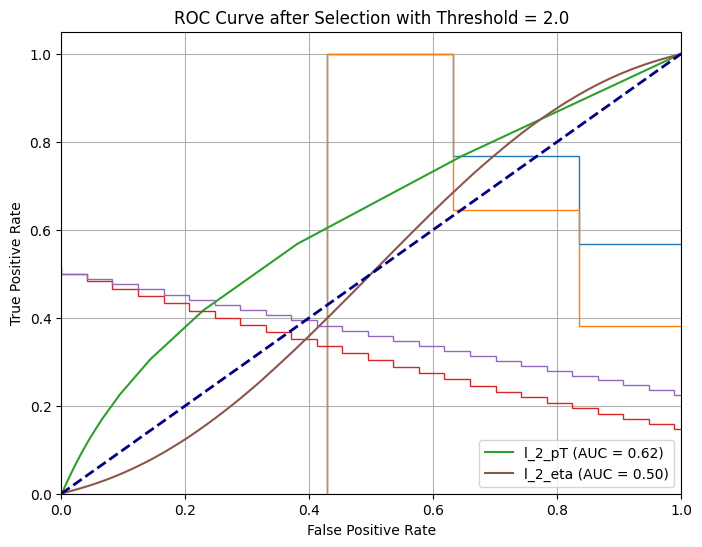

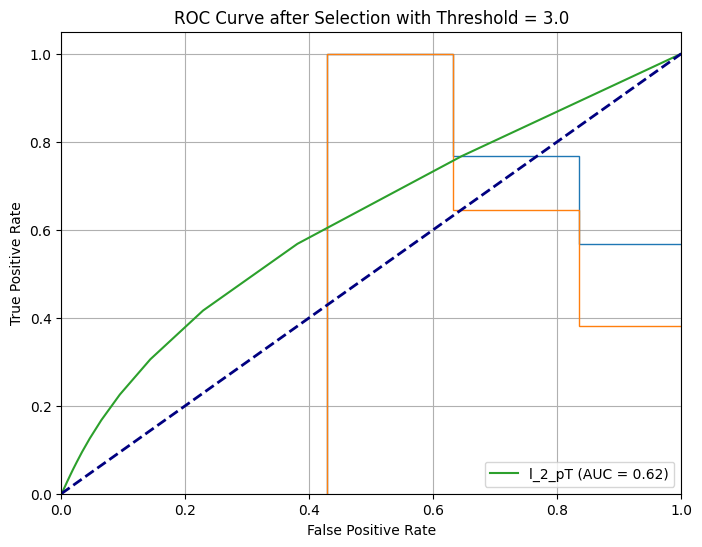

In [49]:
### 7.3

def create_cut_flow_table(df_sig, df_bkg, features, threshold):
    results = {}
    for feature in features:
        # Apply selection
        mask_sig = df_sig[feature] > threshold
        mask_bkg = df_bkg[feature] > threshold
        N_S = sum(mask_sig)
        N_B = sum(mask_bkg)
        # Compute efficiencies
        eff_S = N_S / len(df_sig)
        eff_B = N_B / len(df_bkg)
        # Compute significance
        if N_S == 0 or N_B == 0:
            significance = 0
        else:
            significance = N_S / (N_S + N_B) ** 0.5
        # Store results
        results[feature] = {'Signal Efficiency': eff_S,
                            'Background Efficiency': eff_B,
                            'Number of Selected Signal Events': N_S,
                            'Number of Selected Background Events': N_B,
                            'Significance': significance}
    return results

# Example usage:
features = ['l_2_pT', 'l_2_eta', 'l_2_phi']
thresholds = [1.0, 2.0, 3.0]  # Example thresholds
compare_successive_roc(df_sig, df_bkg, features, thresholds)


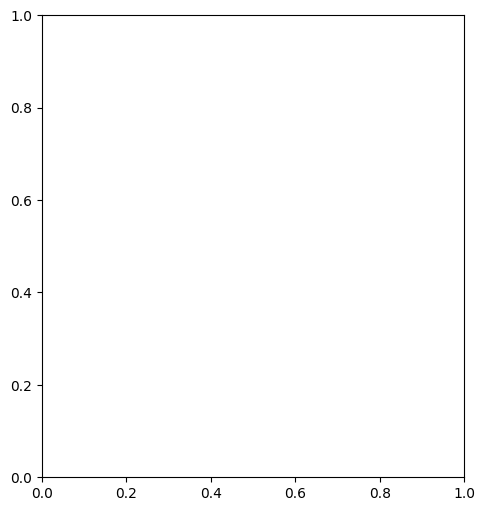

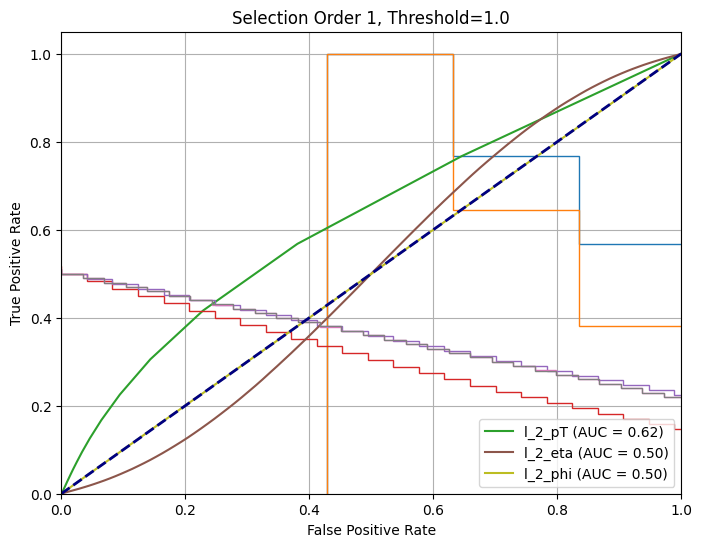

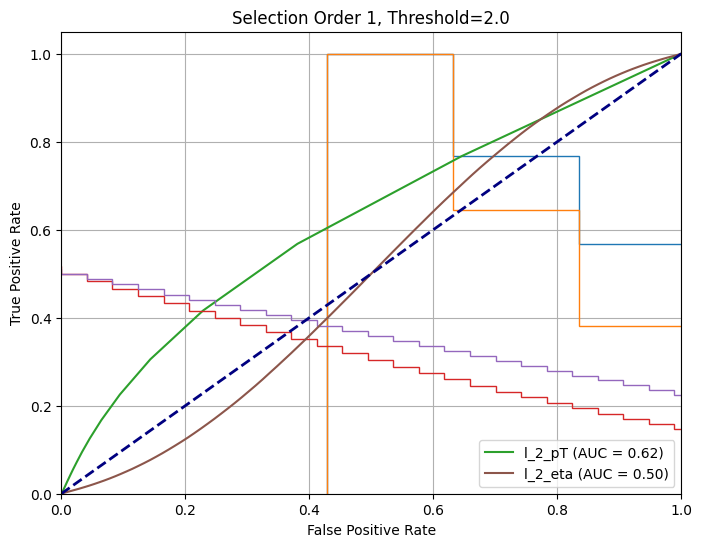

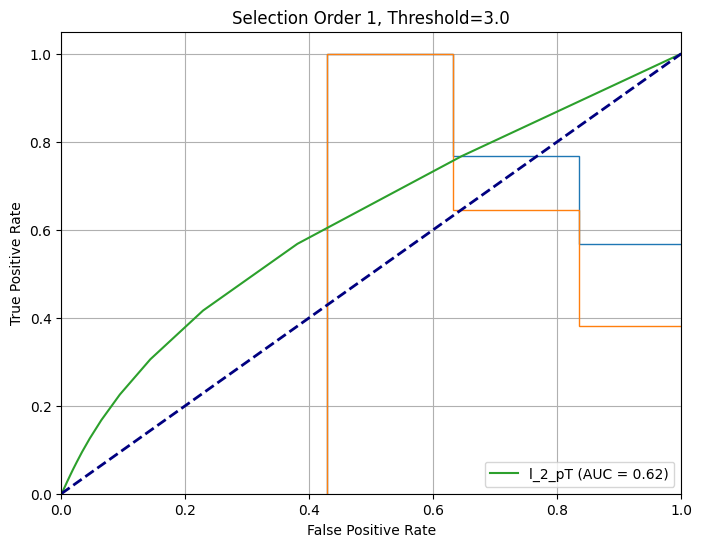

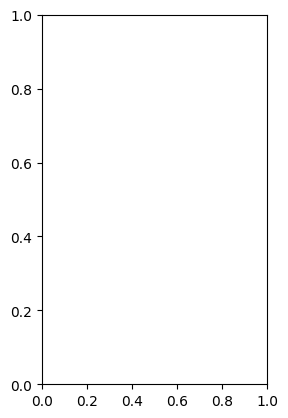

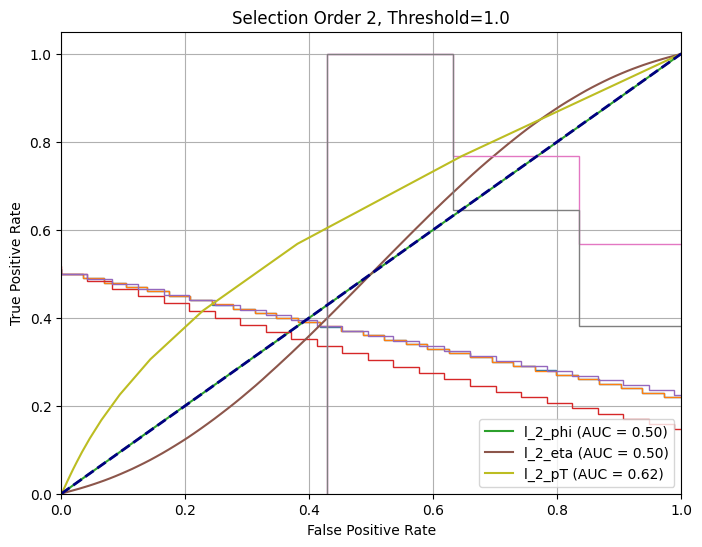

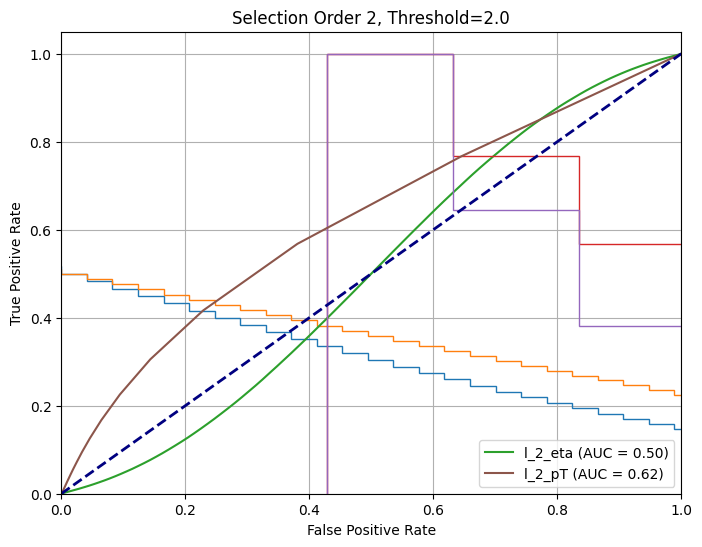

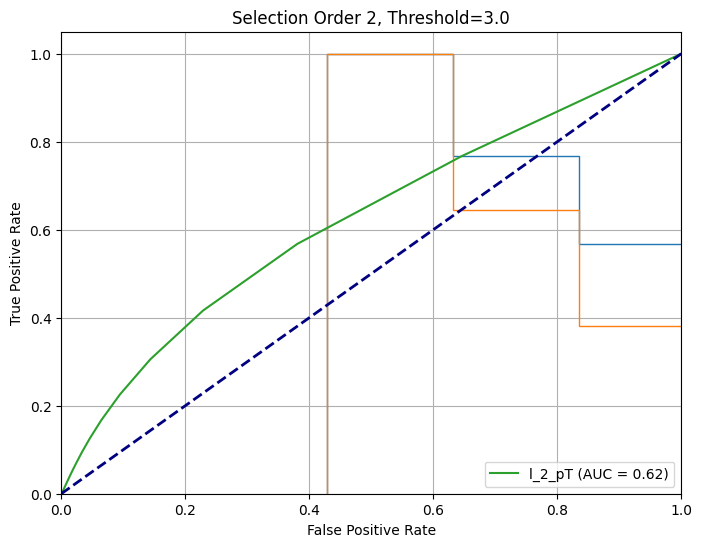

<Figure size 640x480 with 0 Axes>

In [50]:
### 7.4

def compare_selection_order(df_sig, df_bkg, features, thresholds):
    # First, apply selection on the first feature and optimize for the second feature
    selected_features_first = []
    for threshold in thresholds:
        cut_flow_results = create_cut_flow_table(df_sig, df_bkg, features, threshold)
        selected_features_first.append([feature for feature in features if cut_flow_results[feature]['Significance'] > 0])

    # Then, apply selection on the second feature and optimize for the first feature
    selected_features_second = []
    for i in range(len(features)):
        threshold = thresholds[i]
        cut_flow_results = create_cut_flow_table(df_sig, df_bkg, features[::-1], threshold)
        selected_features_second.append([feature for feature in features[::-1] if cut_flow_results[feature]['Significance'] > 0])

    # Plot ROC curves for each selection order
    plt.figure(figsize=(12, 6))
    for i, selected_features in enumerate([selected_features_first, selected_features_second], start=1):
        plt.subplot(1, 2, i)
        for idx, selected_feature in enumerate(selected_features):
            plot_roc_curve(df_sig, df_bkg, selected_feature, title=f'Selection Order {i}, Threshold={thresholds[idx]}')

    plt.tight_layout()
    plt.show()

# Example usage:
features = ['l_2_pT', 'l_2_eta', 'l_2_phi']
thresholds = [1.0, 2.0, 3.0]  # Example thresholds
compare_selection_order(df_sig, df_bkg, features, thresholds)


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.2

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.3

Draw the ROC curve for $F_n$.

### Exercise 8.4

What is the maximal significance you can obtain in the scenarios in exercise 5?

In [53]:
### 8.1
def compute_covariance_matrices(df_sig, df_bkg):
    m1 = np.mean(df_sig, axis=0)
    m2 = np.mean(df_bkg, axis=0)
    SB = np.outer((m2 - m1), (m2 - m1).T)

    SW = np.zeros((df_sig.shape[1], df_sig.shape[1]))
    for _, x in df_sig.iterrows():
        SW += np.outer((x - m1), (x - m1).T)
    for _, x in df_bkg.iterrows():
        SW += np.outer((x - m2), (x - m2).T)

    return SB, SW

# Example usage:
# Assuming df_sig and df_bkg are DataFrame containing the signal and background data, respectively
SB, SW = compute_covariance_matrices(df_sig2, df_bkg2)
print("SB:")
print(SB)
print("SW:")
print(SW)


SB:
[[ 1.00000000e+00  5.36628579e-01  8.55195422e-04  8.71119155e-04
   2.57438138e-01  2.87103698e-03  6.82214057e-04  7.70479546e-01
  -1.18632905e-03  5.05258663e-01  1.59264177e-01  3.39772599e-01
   4.96726533e-01  1.03093163e-01  1.37492503e-01  3.24697188e-01
   3.43098533e-01  2.87082904e-02  1.05525694e-01]
 [ 5.36628579e-01  2.87970231e-01  4.58922304e-04  4.67467434e-04
   1.38148662e-01  1.54068049e-03  3.66095560e-04  4.13461344e-01
  -6.36618070e-04  2.71136238e-01  8.54657090e-02  1.82331687e-01
   2.66557653e-01  5.53227373e-02  7.37824064e-02  1.74241790e-01
   1.84116478e-01  1.54056891e-02  5.66281031e-02]
 [ 8.55195422e-04  4.58922304e-04  7.31359210e-07  7.44977113e-07
   2.20159917e-04  2.45529768e-06  5.83426339e-07  6.58910580e-04
  -1.01454317e-06  4.32094896e-04  1.36201995e-04  2.90571971e-04
   4.24798257e-04  8.81648006e-05  1.17582959e-04  2.77679548e-04
   2.93416294e-04  2.45511986e-05  9.02450903e-05]
 [ 8.71119155e-04  4.67467434e-04  7.44977113e-07  

In [54]:
### 8.2

# Step 2: Compute linear coefficients w
def compute_linear_coefficients(SW, m1, m2):
    w = np.linalg.inv(SW).dot(m2 - m1)
    return w

# Step 3: Compare the histogram of the distribution of Fin for the two categories
def compare_histograms(df_sig, df_bkg, w):
    Fin_signal = np.dot(df_sig.values, w)
    Fin_background = np.dot(df_bkg.values, w)
    # Plot histograms
    plt.hist(Fin_signal, bins=50, alpha=0.5, label='Signal')
    plt.hist(Fin_background, bins=50, alpha=0.5, label='Background')
    plt.xlabel('F_in')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example usage:
# Assuming SB and SW are already computed
m1 = np.mean(df_sig2, axis=0)
m2 = np.mean(df_bkg2, axis=0)
w = compute_linear_coefficients(SW, m1, m2)
compare_histograms(df_sig2, df_bkg2, w)


LinAlgError: Singular matrix

In [55]:
### 8.3

import numpy as np
import matplotlib.pyplot as plt

# Step 3: Draw the ROC curve for Fn
def draw_roc_curve(df_sig2, df_bkg2, w):
    Fin_signal = np.dot(df_sig2.values, w)
    Fin_background = np.dot(df_bkg2.values, w)

    # Calculate TPR and FPR
    TPR, bins_sig, _ = plt.hist(Fin_signal, bins=100, histtype="step", cumulative=-1, density=True) # True positive rate
    FPR, _, _ = plt.hist(Fin_background, bins=bins_sig, histtype="step", cumulative=-1, density=True) # False positive rate

    # Plot ROC curve
    plt.plot(FPR, TPR)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve for F_in')
    plt.grid(True)
    plt.show()

# Example usage:
m1 = np.mean(df_sig2, axis=0)
m2 = np.mean(df_bkg2, axis=0)
w = compute_linear_coefficients(SW, m1, m2)
draw_roc_curve(df_sig2, df_bkg2, w)


LinAlgError: Singular matrix

In [56]:
### 8.4

# Define function to compute significance
def compute_significance(signal_efficiency, background_efficiency):
    return signal_efficiency / np.sqrt(signal_efficiency + background_efficiency)

# Example usage:
# Assuming you have computed the signal and background efficiencies for different threshold values
signal_efficiencies = [0.2, 0.3, 0.4]  # Example signal efficiencies
background_efficiencies = [0.05, 0.1, 0.15]  # Example background efficiencies

# Compute significance for each threshold
significances = [compute_significance(se, be) for se, be in zip(signal_efficiencies, background_efficiencies)]

# Find the maximal significance and corresponding threshold
max_significance = max(significances)
max_significance_threshold = threshold_values[significances.index(max_significance)]

print("Maximal Significance:", max_significance)
print("Corresponding Threshold:", max_significance_threshold)


NameError: name 'threshold_values' is not defined